# Heart Disease Prediction with highest accuracy
### Data Cleaning, Missing Value Prediction and EDA
## DSI7 - Capstone Project 
### By Didem Iscan

## Outline

1. Introduction
2. Data Cleaning
    - Importing 4 different dataset & building a data frame
    - Predicting missing values
3. EDA 
    - Data description & plotting
4. Modelling & Predicting
    - Finding the best model & predict heart disease with highest accuracy  
5. Comparing Best Model with dropped missing values vs predicted missing values
    - Defining new data frame (dropped null values)
    - Model the data frame & compare your scores with the best model
6. Conclusion

# 1. Introduction

My dataset is about heart disease classification from the heart scores that I have. I joined 4 different csv files from different places, which are from Cleveland, Switzerland, LongBeach, and Hungary. I have 919 different subjects and 15 different attributes. I found this dataset from dataworld (link: https://data.world/xprizeai-health/heart-disease). During my analysis, I found different models that I can use for my modelling on Kaggle (link: https://www.kaggle.com/danimal/heartdiseaseensembleclassifier).

In the dataset I have 2 different types of variables:
    - Continuous Variables: suject id, age, trestpbs, chol, thalach, oldpeak
    - Categorical Variables: sex, cp, fbs, restecg, exang, slop, ca, thal, pred_attribute, origin

The aim of this project is to find the best way to predict a heart disease, with the highest accuracy and lowest false positive prediction rate. To have the best prediction I ran different models and found the best model. 

Summary of the sections:
- Section 2 & 3; Analysis and understanding the meaning of each column. Cleaning the dataset, and predicting the null values in the data frame. I predicted the missing values by separating the dataset into four different data frames; healthy female, unhealthy female, healthy male, unhealthy male. This approached increased the prediction of missing values.

- Section 4: I ran different models to predict the heart disease and try to find the best accurate prediction. I did different models, and try to increase the accuracy score to have the best prediction. 

- Section 5: Compare the best model with predicted null values vs dropped null values and see if predicting the missing values increase the accuracy of heart disease prediction. 

# 2. Data Cleaning

In this section, first I imported my four different datasets, then cleaned the dataset and checked the value types to have the data correctly. After orginizing and building a new dataframe called **df**, I predicted the null values by using different modellings. 

- On my dataset there are some '?' variables. How did I fix them?

    1. Changed all the '?' to np.nan 
    2. Turned the columns into float
    3. Checked each '?' columns and see if I can change them by the mean, mode or median.
        - When it didn't work, I checked each missing value and compared the sex, age, heart rates with other 
          rows which doesn't have any missing values. By the analysis I predicted the rates and gave an approximate 
          value.
    4. Split the dataframe into sex, pred_attribute
    5. Used GridSearch to find out the best score for each column
        - Built categorical and continuous grid parameters for decision tree, random forest and bagging models
        - For categorical values:
            1. Calculated the baseline to compare it with the accuracy scores
            2. GridSearch to find the best model
            3. Calculated the accuracy score for each model & compared with the baseline 
            4. Chose the highest value & assigned it as the best model
                - Compared the accuracy score of each model with the baseline, and picked the highest score as the best model. If the baseline is the highest I gave the baseline as a predicted value. Else I used the model and predicted the missing values.
        - For continuous values:
            1. Calculated the mean 
            2. GridSearch to find the best model
            3. Calculated the best score for each model & compared with each other
            4. Chose the highest value & assigned it as the best model
                - Compared the best scores of each model. If the scores were higher than 0 I picked the highest score and predicted the missing values. If the best scores were lower than 0, I used random imputation to predict the missing values, where I picked randomly from my y column and asigned them as predicted values. 
                     
During this process, I first started with the column which has the minimum number of null values, and for each step I updated the 'df' dataframe. I also used pd.get_dummies to dummy the categorical values. At the end I have a clean dataframe called **df**. 


In [1]:
from IPython.display import Image

** Column Description **

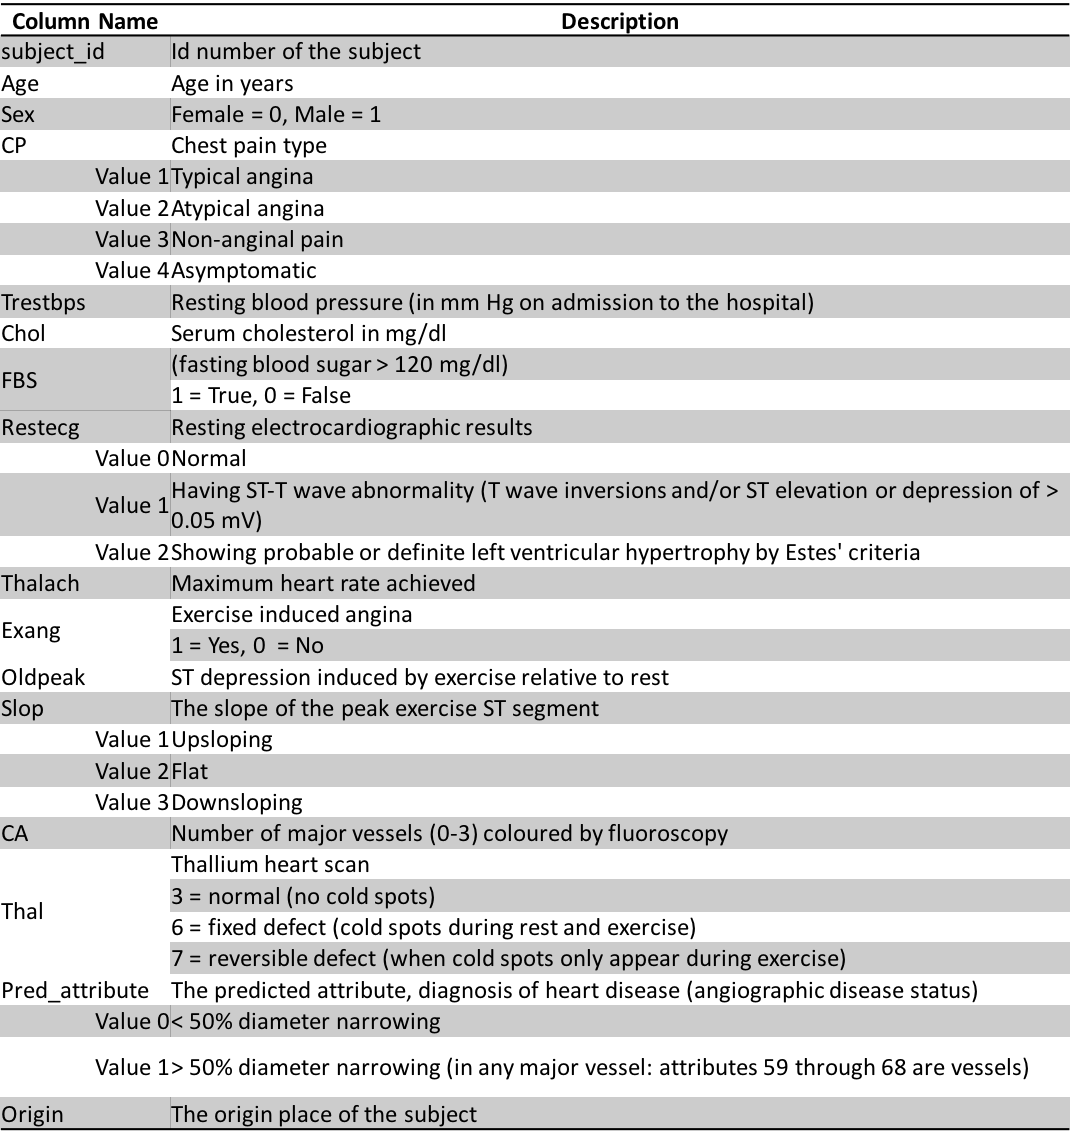

In [2]:
Image("../DSI7_Capstone_Final/Datasets/ColumnDesc.png")

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV, Perceptron
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

import imp

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
random_state = 1
#by assigning a random_state I will be using the same random models
np.random.seed(seed = 1)
#this fill fix my random arrays for the predicted values // each time I will have the same random list

In [4]:
data_dictionary = {"subject_id": "Id number of the subject" ,
                   "age": "Age in years", 
                   "sex": "Female = 0, Male = 1", 
                   "cp": "Chest pain type (value1:Typical angina, value2: Atypical angina, value3: Non-anginal pain, value4: Asymptomatic)", 
                   "trestbps": "Resting blood pressure (in mm Hg on admission to the hospital)" , 
                   "chol": "Serum cholestoral in mg/dl", 
                   "fbs": "fasting blood sugar (1 = True, 0 = False)", 
                   "restecg": "Resting electrocardiographic results (value0: Normal, value1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), value2: Showing probable or definite left ventricular hypertrophy by Estes' criteria)", 
                   "thalach": "Maximum heart rate achieved", 
                   "exang": "Exercise induced angina (1 = Yes, 0  = No)", 
                   "oldpeak": "ST depression induced by exercise relative to rest", 
                   "slop": "The slope of the peak exercise ST segment (value1: Upsloping, value2: flat, value3: Downsloping)", 
                   "ca": "Number of major vessels (0-3) colored by flourosopy", 
                   "thal": "Thalium heart scan (3 = normal (no cold spots), 6 = fixed defect (cold spots during rest and exercise), 7 = reversible defect (when cold spots only appear during exercise))", 
                   "pred_attribute": "The predicted attribute, diagnosis of heart disease (angiographic disease status) (value0: < 50% diameter narrowing, value1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels))",
                   "origin": "The origin place of the subject"}

### Importing the Data 

In [5]:
columns = ("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slop", "ca", "thal", "pred_attribute")

In [6]:
cleveland_data = pd.read_csv("../DSI7_Capstone_Final/Datasets/processed_cleveland_data.csv", header= None)
cleveland_data.columns = columns
cleveland_data['origin'] = 'Cleveland'
#cleveland_data.head()

In [7]:
switzerland_data = pd.read_csv("../DSI7_Capstone_Final/Datasets/processed_switzerland_data.csv", header = None)
switzerland_data.columns = columns
switzerland_data['origin'] = 'Switzerland'
#switzerland_data.head()

In [8]:
longbeachva_data = pd.read_csv("../DSI7_Capstone_Final/Datasets/processed_va_data.csv", header = None)
longbeachva_data.columns = columns
longbeachva_data['origin'] = 'LongBeach'
#longbeachva_data.head()

In [9]:
hungarian_data = pd.read_csv("../DSI7_Capstone_Final/Datasets/reprocessed_hungarian_data.csv", header = None)
hungarian_data.columns = columns
hungarian_data['origin'] = 'Hungarian'
#hungarian_data.head()

In [10]:
joins = [cleveland_data, switzerland_data, longbeachva_data, hungarian_data]
data = pd.concat(joins, ignore_index= True)
data.index.rename('subject_id', inplace= True)
data.reset_index(level=0, inplace=True)
data.head()

subject_id  age  sex  cp trestbps chol fbs restecg thalach exang oldpeak  \
0           0   63    1   1      145  233   1       2     150     0     2.3   
1           1   67    1   4      160  286   0       2     108     1     1.5   
2           2   67    1   4      120  229   0       2     129     1     2.6   
3           3   37    1   3      130  250   0       0     187     0     3.5   
4           4   41    0   2      130  204   0       2     172     0     1.4   

  slop ca thal  pred_attribute     origin  
0    3  0    6               0  Cleveland  
1    2  3    3               2  Cleveland  
2    2  2    7               1  Cleveland  
3    3  0    3               0  Cleveland  
4    1  0    3               0  Cleveland

In [11]:
data.shape

(920, 16)

In [12]:
data.describe(include='all')

subject_id         age         sex          cp  trestbps   chol  \
count   920.000000  920.000000  920.000000  920.000000     920.0  920.0   
unique         NaN         NaN         NaN         NaN     104.0  303.0   
top            NaN         NaN         NaN         NaN     120.0    0.0   
freq           NaN         NaN         NaN         NaN     102.0  123.0   
mean    459.500000   53.510870    0.789130    3.250000       NaN    NaN   
std     265.725422    9.424685    0.408148    0.930969       NaN    NaN   
min       0.000000   28.000000    0.000000    1.000000       NaN    NaN   
25%     229.750000   47.000000    1.000000    3.000000       NaN    NaN   
50%     459.500000   54.000000    1.000000    4.000000       NaN    NaN   
75%     689.250000   60.000000    1.000000    4.000000       NaN    NaN   
max     919.000000   77.000000    1.000000    4.000000       NaN    NaN   

          fbs  restecg thalach  exang  oldpeak   slop   ca   thal  \
count   920.0    920.0     920  920.0    920.0  920.0  920  920.0   
unique    6.0      8.0     192    6.0     80.0    8.0    8    8.0   
top       0.0      0.0       ?    0.0      0.0    2.0    ?   -9.0   
freq    524.0    466.0      54  408.0    288.0  231.0  320  266.0   
mean      NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
std       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
min       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
25%       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
50%       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
75%       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
max       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   

        pred_attribute     origin  
count       920.000000        920  
unique             NaN          4  
top                NaN  Cleveland  
freq               NaN        303  
mean          1.133696        NaN  
std           1.258942        NaN  
min           0.000000        NaN  
25%           0.000000        NaN  
50%           1.000000        NaN  
75%           2.000000        NaN  
max           4.000000        NaN

In [13]:
data.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

### Checking the Missing Values

In [14]:
data[(data['trestbps'] == '?')].shape

(58, 16)

In [15]:
data[(data['chol'] == '?')].shape

(7, 16)

In [16]:
data[(data['fbs'] == '?')].shape

(82, 16)

In [17]:
data[(data['restecg'] == '?')].shape

(1, 16)

In [18]:
data[(data['thalach'] == '?')].shape

(54, 16)

In [19]:
data[(data['exang'] == '?')].shape

(54, 16)

In [20]:
data[(data['oldpeak'] == '?')].shape

(62, 16)

In [21]:
data[(data['slop'] == '?')].shape

(119, 16)

In [22]:
data[(data['ca'] == '?')].shape

(320, 16)

In [23]:
data[(data['thal'] == '?')].shape

(220, 16)

**Replacing all the '?' to NaN **

In [24]:
[data[data.columns[i]].replace('?',np.nan, inplace =True) for i in range(0, len(data.columns))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
data.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [26]:
data.dtypes

subject_id         int64
age                int64
sex                int64
cp                 int64
trestbps          object
chol              object
fbs               object
restecg           object
thalach           object
exang             object
oldpeak           object
slop              object
ca                object
thal              object
pred_attribute     int64
origin            object
dtype: object

** Changing the Data Types into floats **

In [27]:
df = data[['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute']].astype(float)

In [28]:
df['origin'] = data.origin

In [29]:
df.dtypes

subject_id        float64
age               float64
sex               float64
cp                float64
trestbps          float64
chol              float64
fbs               float64
restecg           float64
thalach           float64
exang             float64
oldpeak           float64
slop              float64
ca                float64
thal              float64
pred_attribute    float64
origin             object
dtype: object

In [30]:
df.describe()

subject_id         age         sex          cp    trestbps        chol  \
count  920.000000  920.000000  920.000000  920.000000  862.000000  913.000000   
mean   459.500000   53.510870    0.789130    3.250000  131.968677  193.887185   
std    265.725422    9.424685    0.408148    0.930969   19.651971  114.139483   
min      0.000000   28.000000    0.000000    1.000000   -9.000000   -9.000000   
25%    229.750000   47.000000    1.000000    3.000000  120.000000  167.000000   
50%    459.500000   54.000000    1.000000    4.000000  130.000000  222.000000   
75%    689.250000   60.000000    1.000000    4.000000  140.000000  267.000000   
max    919.000000   77.000000    1.000000    4.000000  200.000000  603.000000   

              fbs     restecg     thalach       exang     oldpeak        slop  \
count  838.000000  919.000000  866.000000  866.000000  858.000000  801.000000   
mean     0.078759    0.594124  137.376443    0.378753    0.878788   -0.784020   
std      0.965846    0.865464   26.385477    0.582767    1.091226    4.616226   
min     -9.000000   -9.000000   -9.000000   -9.000000   -2.600000   -9.000000   
25%      0.000000    0.000000  120.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  140.000000    0.000000    0.500000    2.000000   
75%      0.000000    1.000000  157.000000    1.000000    1.500000    2.000000   
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000   

               ca        thal  pred_attribute  
count  600.000000  700.000000      920.000000  
mean    -3.986667   -0.265714        1.133696  
std      4.910874    7.007515        1.258942  
min     -9.000000   -9.000000        0.000000  
25%     -9.000000   -9.000000        0.000000  
50%      0.000000    3.000000        1.000000  
75%      0.000000    7.000000        2.000000  
max      9.000000    7.000000        4.000000

In [31]:
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [32]:
df.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [33]:
df.corr()

subject_id       age       sex        cp  trestbps      chol  \
subject_id        1.000000 -0.215586  0.046313 -0.075652  0.030370  0.035799   
age              -0.215586  1.000000  0.056889  0.166245  0.241348 -0.056786   
sex               0.046313  0.056889  1.000000  0.170392  0.016572 -0.175562   
cp               -0.075652  0.166245  0.170392  1.000000  0.035459 -0.106855   
trestbps          0.030370  0.241348  0.016572  0.035459  1.000000  0.072612   
chol              0.035799 -0.056786 -0.175562 -0.106855  0.072612  1.000000   
fbs              -0.122225  0.149837  0.094207  0.035608  0.086172 -0.066110   
restecg          -0.341769  0.196064 -0.020777  0.058051  0.079867  0.119683   
thalach          -0.178261 -0.355635 -0.163759 -0.333931 -0.053556  0.210071   
exang            -0.030919  0.178867  0.186268  0.375594  0.257686 -0.028022   
oldpeak          -0.150870  0.258243  0.103930  0.244245  0.148126  0.070114   
slop             -0.609516  0.389939  0.084032  0.320029  0.043381 -0.107739   
ca               -0.930058  0.405383 -0.038389  0.122921  0.005514  0.059731   
thal             -0.796862  0.365927  0.086906  0.221278  0.030514 -0.158492   
pred_attribute   -0.045676  0.280461  0.258224  0.405022  0.165424 -0.098056   

                     fbs   restecg   thalach     exang   oldpeak      slop  \
subject_id     -0.122225 -0.341769 -0.178261 -0.030919 -0.150870 -0.609516   
age             0.149837  0.196064 -0.355635  0.178867  0.258243  0.389939   
sex             0.094207 -0.020777 -0.163759  0.186268  0.103930  0.084032   
cp              0.035608  0.058051 -0.333931  0.375594  0.244245  0.320029   
trestbps        0.086172  0.079867 -0.053556  0.257686  0.148126  0.043381   
chol           -0.066110  0.119683  0.210071 -0.028022  0.070114 -0.107739   
fbs             1.000000  0.086927 -0.013337  0.032546  0.064382  0.125543   
restecg         0.086927  1.000000  0.046074  0.024689  0.119995  0.250590   
thalach        -0.013337  0.046074  1.000000 -0.189574 -0.155005 -0.165112   
exang           0.032546  0.024689 -0.189574  1.000000  0.308445  0.314035   
oldpeak         0.064382  0.119995 -0.155005  0.308445  1.000000  0.497289   
slop            0.125543  0.250590 -0.165112  0.314035  0.497289  1.000000   
ca              0.150423  0.423142  0.174357  0.067568  0.241648  0.666188   
thal            0.117859  0.320590 -0.008413  0.152492  0.192268  0.631928   
pred_attribute  0.109248  0.061876 -0.381984  0.382178  0.469537  0.371813   

                      ca      thal  pred_attribute  
subject_id     -0.930058 -0.796862       -0.045676  
age             0.405383  0.365927        0.280461  
sex            -0.038389  0.086906        0.258224  
cp              0.122921  0.221278        0.405022  
trestbps        0.005514  0.030514        0.165424  
chol            0.059731 -0.158492       -0.098056  
fbs             0.150423  0.117859        0.109248  
restecg         0.423142  0.320590        0.061876  
thalach         0.174357 -0.008413       -0.381984  
exang           0.067568  0.152492        0.382178  
oldpeak         0.241648  0.192268        0.469537  
slop            0.666188  0.631928        0.371813  
ca              1.000000  0.864182        0.106134  
thal            0.864182  1.000000        0.211016  
pred_attribute  0.106134  0.211016        1.000000

In [34]:
df.corr()[['pred_attribute']]

pred_attribute
subject_id           -0.045676
age                   0.280461
sex                   0.258224
cp                    0.405022
trestbps              0.165424
chol                 -0.098056
fbs                   0.109248
restecg               0.061876
thalach              -0.381984
exang                 0.382178
oldpeak               0.469537
slop                  0.371813
ca                    0.106134
thal                  0.211016
pred_attribute        1.000000

** Downloading Missing Valued Data Frame ** 

In [35]:
df.to_csv(path_or_buf='../DSI7_Capstone_Final/Datasets/df_null.csv' ,index=False)

### Predicting Missing Values

In this section I will predict the missing values. To predict the missing values, I used two different approaches:
1. Predicting the missing values by using the whole dataset.
2. Predicting the missing values by separating the dataset into four different categories. 

I created two different missing value predicted data frames and compared the disease prediction accuracy scores. As a result, I concluded that predicting missing values by separating them into categories such as sex and diseased or not, it will predict better. Thus, for the next steps I will use the data frame I built from my second approach. 

1. Check which values are null in your data frame 
    - This process will be repeated 4 times for female & male unhealthy & healthy data frames.
2. Start predicting from smallest number of null valued column
    - Dummy the categorical values on your data frame
    - Define X&y values
        - y is the column you want to predict
        - X is the columns that does not have any missing values     
3. Use GridSearch Function to find the best model & predict the missing values
    - For categorical columns
        - Compare your accuracy scores with the baseline, if the scores are higher than the baseline pick the highest score. If not pick the baseline to fill the missing value.
    - For continuous columns
        - If the best score for each model is greater than 0, pick the highest score and do the prediction. If not fill the missing values with the mean of y.
4. Repeat first three steps for female_healthy, female_unhealthy, male_healthy, male_unhealthy data frames, after predicting all the missing values join four data frames. 

### Splitting the Data Frame 
By splitting the Data Frame according to sex, and type of pred_attribute, the missing value prediction will be more accurate. 

**Splitting According to Sex **

In [36]:
df_male = df[df['sex']==1]
df_female = df[df['sex'] == 0]

** Splitting Unhealthy(pred_attribute > 0) or Healthy(pred_attribute = 0) **

In [37]:
df_male_0 = df_male[df_male['pred_attribute'] == 0]
df_male_1 = df_male[df_male['pred_attribute'] > 0]

In [38]:
df_female_0 = df_female[df_female['pred_attribute'] == 0]
df_female_1 = df_female[df_female['pred_attribute'] > 0]

** GridSearch Function to Find the Best Model **

In [39]:
def grid_search_func(estimator, params, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv,
        iid=False)

    gs.fit(X, y)

    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()

    predictions = gs.best_estimator_.predict(X)
    print('Test score: ', scoring_function(y, predictions))

    return gs

** Models **

In [40]:
#regressor
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()
model_bgr = BaggingRegressor()

#classifier
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_bgc = BaggingClassifier()

** Parameters for GridSearch **

In [47]:
#regressor
params_dtr = {'max_depth': list(range(1,11))+[None],'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfr = {'n_estimators': np.arange(10,100,10), 'max_depth': np.linspace(10,10,10), 
              'max_features': ['auto','sqrt'], 'bootstrap':['True','False']}
params_bgr = {'base_estimator':[None, DecisionTreeRegressor(),KNeighborsRegressor(),SVR()],
              'n_estimators':np.arange(10,100,10), 'max_samples':np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap':['True','False']}

#classifier
params_dtc = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,11),
              'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfc = {'criterion': ['gini', 'entropy'], 'n_estimators':np.arange(10,100,10), 
              #'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap':['True','False'], 
              'max_features':['auto', 'sqrt', 'log2'], 'max_depth' : [1, 5, 10, 15, 20, 25, 30], 
              'min_samples_leaf' : [1, 2, 4, 6, 8, 10]}
params_bgc = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap': ['True','False']}

### Predicting Healthy Female Missing Values

In [41]:
df_female_0.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          1
chol              0
fbs               0
restecg           0
thalach           1
exang             1
oldpeak           1
slop              2
ca                3
thal              3
pred_attribute    0
origin            0
dtype: int64

In [42]:
df_female_0.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

In [43]:
# Get Dummies for Categorical Values
df_female_0_dum = pd.get_dummies(df_female_0, columns=['cp','fbs', 'restecg','origin'], drop_first=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
4          4.0  41.0  0.0     130.0  204.0    172.0    0.0      1.4   1.0   
7          7.0  57.0  0.0     120.0  354.0    163.0    1.0      0.6   1.0   
11        11.0  56.0  0.0     140.0  294.0    153.0    0.0      1.3   2.0   
18        18.0  48.0  0.0     130.0  275.0    139.0    0.0      0.2   1.0   
21        21.0  58.0  0.0     150.0  283.0    162.0    0.0      1.0   1.0   

     ca        ...         pred_attribute  cp_2.0  cp_3.0  cp_4.0  fbs_0.0  \
4   0.0        ...                    0.0       1       0       0        1   
7   0.0        ...                    0.0       0       0       1        1   
11  0.0        ...                    0.0       1       0       0        1   
18  0.0        ...                    0.0       0       1       0        1   
21  0.0        ...                    0.0       0       0       0        0   

    fbs_1.0  restecg_1.0  restecg_2.0  origin_Hungarian  origin_LongBeach  
4         0            0            1                 0                 0  
7         0            0            0                 0                 0  
11        0            0            1                 0                 0  
18        0            0            0                 0                 0  
21        1            0            1                 0                 0  

[5 rows x 21 columns]

### Predicting Trestbps Column 

** Defining X&y Value**

In [44]:
mask = df_female_0['trestbps'].isnull()

In [45]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
       'origin_Hungarian', 'origin_LongBeach'],
      dtype='object')

In [46]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
                                'origin_Hungarian', 'origin_LongBeach']]

X.dropna(inplace=True)
y = X.pop('trestbps')

** Finding Best Score by Using Grid Search ** 

In [48]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.03814400081863787

Best estimator
{'criterion': 'mse', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.1716922431824407
Best score
-0.10508683758182862

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8076111708953374
Best score
-0.03211772031580138

Best estimator
{'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'b

- From analysis above, the scores of each model are below 0 which shows us the model is not good enough to predict. So I will replace the missing value with the mean.


In [49]:
round(y.mean())

128

** Adding Predicted Column in the DataFrame **

In [50]:
df_female_0['trestbps'].fillna(round(y.mean()), inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [51]:
df_female_0_dum['trestbps'].fillna(round(y.mean()), inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
4          4.0  41.0  0.0     130.0  204.0    172.0    0.0      1.4   1.0   
7          7.0  57.0  0.0     120.0  354.0    163.0    1.0      0.6   1.0   
11        11.0  56.0  0.0     140.0  294.0    153.0    0.0      1.3   2.0   
18        18.0  48.0  0.0     130.0  275.0    139.0    0.0      0.2   1.0   
21        21.0  58.0  0.0     150.0  283.0    162.0    0.0      1.0   1.0   

     ca        ...         pred_attribute  cp_2.0  cp_3.0  cp_4.0  fbs_0.0  \
4   0.0        ...                    0.0       1       0       0        1   
7   0.0        ...                    0.0       0       0       1        1   
11  0.0        ...                    0.0       1       0       0        1   
18  0.0        ...                    0.0       0       1       0        1   
21  0.0        ...                    0.0       0       0       0        0   

    fbs_1.0  restecg_1.0  restecg_2.0  origin_Hungarian  origin_LongBeach  
4         0            0            1                 0                 0  
7         0            0            0                 0                 0  
11        0            0            1                 0                 0  
18        0            0            0                 0                 0  
21        1            0            1                 0                 0  

[5 rows x 21 columns]

In [52]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             1
exang               1
oldpeak             1
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
dtype: int64

### Predicting Thalach Column

** Defining X&y Value**

In [53]:
mask = df_female_0['thalach'].isnull()

In [54]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
       'origin_Hungarian', 'origin_LongBeach'],
      dtype='object')

In [55]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach',
                                'origin_Hungarian', 'origin_LongBeach']]

X.dropna(inplace=True)
y = X.pop('thalach')

** Finding Best Score by Using Grid Search ** 

In [56]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.036089933807216014

Best estimator
{'criterion': 'mse', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.3531809972785366
Best score
0.08867867934135536

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8696395443293783
Best score
0.08020697212885859

Best estimator
{'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'bas

- From the model above the scores are all greater than 0, I will predict the missing values by using **gs_rfr** model.

** Finding the Predicted Value ** 

In [57]:
round(y.mean())

148

** Finding the Predicted Value ** 

In [58]:
idx = df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
                                'origin_Hungarian', 'origin_LongBeach']].dropna().index

preds = gs_rfr.best_estimator_.predict(df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
                                'origin_Hungarian', 'origin_LongBeach']].dropna())

preds = pd.Series(preds, index = idx)
df_female_0_dum['predicted'] = preds

In [59]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             1
exang               1
oldpeak             1
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
predicted           0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [60]:
df_female_0['thalach'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [61]:
df_female_0_dum['thalach'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
4          4.0  41.0  0.0     130.0  204.0    172.0    0.0      1.4   1.0   
7          7.0  57.0  0.0     120.0  354.0    163.0    1.0      0.6   1.0   
11        11.0  56.0  0.0     140.0  294.0    153.0    0.0      1.3   2.0   
18        18.0  48.0  0.0     130.0  275.0    139.0    0.0      0.2   1.0   
21        21.0  58.0  0.0     150.0  283.0    162.0    0.0      1.0   1.0   

     ca     ...      cp_2.0  cp_3.0  cp_4.0  fbs_0.0  fbs_1.0  restecg_1.0  \
4   0.0     ...           1       0       0        1        0            0   
7   0.0     ...           0       0       1        1        0            0   
11  0.0     ...           1       0       0        1        0            0   
18  0.0     ...           0       1       0        1        0            0   
21  0.0     ...           0       0       0        0        1            0   

    restecg_2.0  origin_Hungarian  origin_LongBeach   predicted  
4             1                 0                 0  172.541190  
7             0                 0                 0  160.189931  
11            1                 0                 0  155.902399  
18            0                 0                 0  143.611290  
21            1                 0                 0  157.937359  

[5 rows x 22 columns]

In [62]:
df_female_0_dum.pop('predicted')
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
4          4.0  41.0  0.0     130.0  204.0    172.0    0.0      1.4   1.0   
7          7.0  57.0  0.0     120.0  354.0    163.0    1.0      0.6   1.0   
11        11.0  56.0  0.0     140.0  294.0    153.0    0.0      1.3   2.0   
18        18.0  48.0  0.0     130.0  275.0    139.0    0.0      0.2   1.0   
21        21.0  58.0  0.0     150.0  283.0    162.0    0.0      1.0   1.0   

     ca        ...         pred_attribute  cp_2.0  cp_3.0  cp_4.0  fbs_0.0  \
4   0.0        ...                    0.0       1       0       0        1   
7   0.0        ...                    0.0       0       0       1        1   
11  0.0        ...                    0.0       1       0       0        1   
18  0.0        ...                    0.0       0       1       0        1   
21  0.0        ...                    0.0       0       0       0        0   

    fbs_1.0  restecg_1.0  restecg_2.0  origin_Hungarian  origin_LongBeach  
4         0            0            1                 0                 0  
7         0            0            0                 0                 0  
11        0            0            1                 0                 0  
18        0            0            0                 0                 0  
21        1            0            1                 0                 0  

[5 rows x 21 columns]

In [63]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
exang               1
oldpeak             1
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
dtype: int64

### Predicting Exang Column

** Defining X&y Value**

In [64]:
mask = df_female_0['exang'].isnull()

In [65]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
       'origin_Hungarian', 'origin_LongBeach'],
      dtype='object')

In [66]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'exang',
                                'origin_Hungarian', 'origin_LongBeach']]

X.dropna(inplace=True)
y = X.pop('exang')

In [67]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 0.0    0.881119
 1.0    0.111888
-9.0    0.006993
Name: exang, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [68]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.023249042145593802

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.875850094052959
Best score
0.12845977011494258

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.15164230936188672
Best score
0.12845977011494258

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 10, 'max_sa

In [69]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.916083916083916


In [70]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.986013986013986


In [71]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [72]:
idx = df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach',
                                'origin_Hungarian', 'origin_LongBeach']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach',
                                'origin_Hungarian', 'origin_LongBeach']].dropna())

preds = pd.Series(preds, index = idx)
df_female_0_dum['predicted'] = preds

In [73]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
exang               1
oldpeak             1
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
predicted           0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [74]:
df_female_0['exang'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [75]:
df_female_0_dum['exang'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
4          4.0  41.0  0.0     130.0  204.0    172.0    0.0      1.4   1.0   
7          7.0  57.0  0.0     120.0  354.0    163.0    1.0      0.6   1.0   
11        11.0  56.0  0.0     140.0  294.0    153.0    0.0      1.3   2.0   
18        18.0  48.0  0.0     130.0  275.0    139.0    0.0      0.2   1.0   
21        21.0  58.0  0.0     150.0  283.0    162.0    0.0      1.0   1.0   

     ca    ...      cp_2.0  cp_3.0  cp_4.0  fbs_0.0  fbs_1.0  restecg_1.0  \
4   0.0    ...           1       0       0        1        0            0   
7   0.0    ...           0       0       1        1        0            0   
11  0.0    ...           1       0       0        1        0            0   
18  0.0    ...           0       1       0        1        0            0   
21  0.0    ...           0       0       0        0        1            0   

    restecg_2.0  origin_Hungarian  origin_LongBeach  predicted  
4             1                 0                 0        0.0  
7             0                 0                 0        1.0  
11            1                 0                 0        0.0  
18            0                 0                 0        0.0  
21            1                 0                 0        0.0  

[5 rows x 22 columns]

In [76]:
df_female_0_dum.pop('predicted')
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
4          4.0  41.0  0.0     130.0  204.0    172.0    0.0      1.4   1.0   
7          7.0  57.0  0.0     120.0  354.0    163.0    1.0      0.6   1.0   
11        11.0  56.0  0.0     140.0  294.0    153.0    0.0      1.3   2.0   
18        18.0  48.0  0.0     130.0  275.0    139.0    0.0      0.2   1.0   
21        21.0  58.0  0.0     150.0  283.0    162.0    0.0      1.0   1.0   

     ca        ...         pred_attribute  cp_2.0  cp_3.0  cp_4.0  fbs_0.0  \
4   0.0        ...                    0.0       1       0       0        1   
7   0.0        ...                    0.0       0       0       1        1   
11  0.0        ...                    0.0       1       0       0        1   
18  0.0        ...                    0.0       0       1       0        1   
21  0.0        ...                    0.0       0       0       0        0   

    fbs_1.0  restecg_1.0  restecg_2.0  origin_Hungarian  origin_LongBeach  
4         0            0            1                 0                 0  
7         0            0            0                 0                 0  
11        0            0            1                 0                 0  
18        0            0            0                 0                 0  
21        1            0            1                 0                 0  

[5 rows x 21 columns]

In [77]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
exang               0
oldpeak             1
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
dtype: int64

### Predicting Oldpeak Column

** Defining X&y Value**

In [78]:
mask = df_female_0['oldpeak'].isnull()

In [79]:
df_female_0_dum = pd.get_dummies(df_female_0_dum, columns=['exang'], drop_first=True)

In [80]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'exang_0.0', 'exang_1.0'],
      dtype='object')

In [81]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach', 'exang_0.0', 'exang_1.0']]

X.dropna(inplace=True)
y = X.pop('oldpeak')

** Finding Best Score by Using Grid Search ** 

In [82]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.22557381416565522

Best estimator
{'criterion': 'mse', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.36090798003766034
Best score
0.07133497370653778

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8178664132215472
Best score
0.019900480739343317

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 11, 'max_samples': 0.9, 'n_estimators': 40, 'n_jobs': None

- From the model above the scores are all greater than 0, thus I will predict the missing value according to the accuracy scores.
- The highest score is **gs_bgr** model. I will predict the missing value with **gs_bgr** model.

** Finding the Predicted Value ** 

In [83]:
idx = df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach',
                                'origin_Hungarian', 'origin_LongBeach','exang_0.0', 'exang_1.0']].dropna().index

preds = gs_bgr.best_estimator_.predict(df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 
                                                        'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach',
                                'origin_Hungarian', 'origin_LongBeach','exang_0.0', 'exang_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_female_0_dum['predicted'] = preds

In [84]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             1
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
predicted           0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [85]:
df_female_0['oldpeak'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [86]:
df_female_0_dum['oldpeak'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6   1.0  0.0   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3   2.0  0.0   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2   1.0  0.0   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0   1.0  0.0   3.0   

      ...      cp_4.0  fbs_0.0  fbs_1.0  restecg_1.0  restecg_2.0  \
4     ...           0        1        0            0            1   
7     ...           1        1        0            0            0   
11    ...           0        1        0            0            1   
18    ...           0        1        0            0            0   
21    ...           0        0        1            0            1   

    origin_Hungarian  origin_LongBeach  exang_0.0  exang_1.0  predicted  
4                  0                 0          1          0     1.1825  
7                  0                 0          0          1     0.5350  
11                 0                 0          1          0     1.1525  
18                 0                 0          1          0     0.3925  
21                 0                 0          1          0     0.8900  

[5 rows x 23 columns]

In [87]:
df_female_0_dum.pop('predicted')
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6   1.0  0.0   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3   2.0  0.0   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2   1.0  0.0   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0   1.0  0.0   3.0   

      ...      cp_3.0  cp_4.0  fbs_0.0  fbs_1.0  restecg_1.0  restecg_2.0  \
4     ...           0       0        1        0            0            1   
7     ...           0       1        1        0            0            0   
11    ...           0       0        1        0            0            1   
18    ...           1       0        1        0            0            0   
21    ...           0       0        0        1            0            1   

    origin_Hungarian  origin_LongBeach  exang_0.0  exang_1.0  
4                  0                 0          1          0  
7                  0                 0          0          1  
11                 0                 0          1          0  
18                 0                 0          1          0  
21                 0                 0          1          0  

[5 rows x 22 columns]

In [88]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
dtype: int64

### Predicting Slop Column

** Defining X&y Value**

In [89]:
mask = df_female_0['slop'].isnull()

In [90]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'exang_0.0', 'exang_1.0'],
      dtype='object')

In [91]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach', 'slop', 'exang_0.0', 'exang_1.0']]

X.dropna(inplace=True)
y = X.pop('slop')

In [92]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

-9.0    0.373239
 1.0    0.359155
 2.0    0.253521
 3.0    0.014085
Name: slop, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [93]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.6808155860730888

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.9917879201461981
Best score
0.9629573251306291

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  1.0
Best score
0.9616011156340294

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 13, 'max_samples': 1.0, 'n_est

In [94]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7887323943661971


In [95]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


In [96]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_rfc** with the highest score.

** Finding the Predicted Value ** 

In [97]:
idx = df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach','exang_0.0', 'exang_1.0']].dropna().index

preds = gs_rfc.best_estimator_.predict(df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 
                                                        'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach','exang_0.0', 'exang_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_female_0_dum['predicted'] = preds

In [98]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
slop                2
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
predicted           0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [99]:
df_female_0['slop'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [100]:
df_female_0_dum['slop'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6   1.0  0.0   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3   2.0  0.0   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2   1.0  0.0   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0   1.0  0.0   3.0   

      ...      cp_4.0  fbs_0.0  fbs_1.0  restecg_1.0  restecg_2.0  \
4     ...           0        1        0            0            1   
7     ...           1        1        0            0            0   
11    ...           0        1        0            0            1   
18    ...           0        1        0            0            0   
21    ...           0        0        1            0            1   

    origin_Hungarian  origin_LongBeach  exang_0.0  exang_1.0  predicted  
4                  0                 0          1          0        1.0  
7                  0                 0          0          1        1.0  
11                 0                 0          1          0        2.0  
18                 0                 0          1          0        1.0  
21                 0                 0          1          0        1.0  

[5 rows x 23 columns]

In [101]:
df_female_0_dum.pop('predicted')
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6   1.0  0.0   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3   2.0  0.0   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2   1.0  0.0   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0   1.0  0.0   3.0   

      ...      cp_3.0  cp_4.0  fbs_0.0  fbs_1.0  restecg_1.0  restecg_2.0  \
4     ...           0       0        1        0            0            1   
7     ...           0       1        1        0            0            0   
11    ...           0       0        1        0            0            1   
18    ...           1       0        1        0            0            0   
21    ...           0       0        0        1            0            1   

    origin_Hungarian  origin_LongBeach  exang_0.0  exang_1.0  
4                  0                 0          1          0  
7                  0                 0          0          1  
11                 0                 0          1          0  
18                 0                 0          1          0  
21                 0                 0          1          0  

[5 rows x 22 columns]

In [102]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
slop                0
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
dtype: int64

### Predicting Ca Column

** Defining X&y Value**

In [103]:
mask = df_female_0['ca'].isnull()

In [104]:
df_female_0_dum = pd.get_dummies(df_female_0_dum, columns= ['slop'], drop_first = True)

In [105]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0',
       'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'exang_0.0', 'exang_1.0', 'slop_1.0', 'slop_2.0',
       'slop_3.0'],
      dtype='object')

In [106]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach', 'ca', 'exang_0.0', 'exang_1.0', 'slop_1.0',
                                'slop_2.0','slop_3.0']]

X.dropna(inplace=True)
y = X.pop('ca')

In [107]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

-9.0    0.482270
 0.0    0.390071
 1.0    0.085106
 2.0    0.035461
 9.0    0.007092
Name: ca, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [108]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.9097861164796288

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.9928725274725275
Best score
0.9113468675102927

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8927780219780219
Best score
0.9106500414905531

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 14, 'max_sample

In [109]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.900709219858156


In [110]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.900709219858156


In [111]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9929078014184397


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [112]:
idx = df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach', 'exang_0.0', 'exang_1.0', 'slop_1.0', 
                       'slop_2.0','slop_3.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 
                                                        'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach', 'exang_0.0', 'exang_1.0', 'slop_1.0', 
                                                        'slop_2.0','slop_3.0']].dropna())

preds = pd.Series(preds, index = idx)
df_female_0_dum['predicted'] = preds

In [113]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
ca                  3
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
slop_1.0            0
slop_2.0            0
slop_3.0            0
predicted           0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [114]:
df_female_0['ca'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [115]:
df_female_0_dum['ca'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4  0.0   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6  0.0   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3  0.0   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2  0.0   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0  0.0   3.0   

    pred_attribute    ...      restecg_1.0  restecg_2.0  origin_Hungarian  \
4              0.0    ...                0            1                 0   
7              0.0    ...                0            0                 0   
11             0.0    ...                0            1                 0   
18             0.0    ...                0            0                 0   
21             0.0    ...                0            1                 0   

    origin_LongBeach  exang_0.0  exang_1.0  slop_1.0  slop_2.0  slop_3.0  \
4                  0          1          0         1         0         0   
7                  0          0          1         1         0         0   
11                 0          1          0         0         1         0   
18                 0          1          0         1         0         0   
21                 0          1          0         1         0         0   

    predicted  
4         0.0  
7         0.0  
11        0.0  
18        0.0  
21        0.0  

[5 rows x 25 columns]

In [116]:
df_female_0_dum.pop('predicted')
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4  0.0   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6  0.0   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3  0.0   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2  0.0   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0  0.0   3.0   

    pred_attribute    ...     fbs_1.0  restecg_1.0  restecg_2.0  \
4              0.0    ...           0            0            1   
7              0.0    ...           0            0            0   
11             0.0    ...           0            0            1   
18             0.0    ...           0            0            0   
21             0.0    ...           1            0            1   

    origin_Hungarian  origin_LongBeach  exang_0.0  exang_1.0  slop_1.0  \
4                  0                 0          1          0         1   
7                  0                 0          0          1         1   
11                 0                 0          1          0         0   
18                 0                 0          1          0         1   
21                 0                 0          1          0         1   

    slop_2.0  slop_3.0  
4          0         0  
7          0         0  
11         1         0  
18         0         0  
21         0         0  

[5 rows x 24 columns]

In [117]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
ca                  0
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
slop_1.0            0
slop_2.0            0
slop_3.0            0
dtype: int64

### Predicting Thal Column

** Defining X&y Value**

In [118]:
mask = df_female_0['thal'].isnull()

In [119]:
df_female_0_dum = pd.get_dummies(df_female_0_dum, columns= ['ca'], drop_first=True)

In [120]:
df_female_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0',
       'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'exang_0.0', 'exang_1.0', 'slop_1.0', 'slop_2.0',
       'slop_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_9.0'],
      dtype='object')

In [121]:
X = df_female_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach', 'thal','exang_0.0', 'exang_1.0', 'slop_1.0', 
                                'slop_2.0','slop_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_9.0']]

X.dropna(inplace=True)
y = X.pop('thal')

In [122]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 3.0    0.496454
-9.0    0.468085
 7.0    0.028369
 6.0    0.007092
Name: thal, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [123]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.8751833903443973

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.8290007810549024
Best score
0.8751833903443973

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8290007810549024
Best score
0.8751833903443973

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 10, 'max_samples': 0.

In [124]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9574468085106383


In [125]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9574468085106383


In [126]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9858156028368794


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [127]:
idx = df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 'cp_2.0', 'cp_3.0',
                                'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'thalach', 'oldpeak',
                                'origin_Hungarian', 'origin_LongBeach','exang_0.0', 'exang_1.0', 'slop_1.0', 
                                'slop_2.0','slop_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_9.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_female_0_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol', 'pred_attribute', 
                                                        'cp_2.0', 'cp_3.0','cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_1.0', 
                                                        'restecg_2.0', 'thalach', 'oldpeak','origin_Hungarian', 
                                                        'origin_LongBeach','exang_0.0', 'exang_1.0', 'slop_1.0', 
                                'slop_2.0','slop_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_9.0']].dropna())

preds = pd.Series(preds, index = idx)
df_female_0_dum['predicted'] = preds

In [128]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
thal                3
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
slop_1.0            0
slop_2.0            0
slop_3.0            0
ca_0.0              0
ca_1.0              0
ca_2.0              0
ca_9.0              0
predicted           0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [129]:
df_female_0['thal'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
4          4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
7          7.0  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
11        11.0  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
18        18.0  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
21        21.0  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
4       1.4   1.0  0.0   3.0             0.0  Cleveland  
7       0.6   1.0  0.0   3.0             0.0  Cleveland  
11      1.3   2.0  0.0   3.0             0.0  Cleveland  
18      0.2   1.0  0.0   3.0             0.0  Cleveland  
21      1.0   1.0  0.0   3.0             0.0  Cleveland

In [130]:
df_female_0_dum['thal'].fillna(df_female_0_dum['predicted'], inplace=True)
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0   3.0   

    pred_attribute  cp_2.0    ...      exang_0.0  exang_1.0  slop_1.0  \
4              0.0       1    ...              1          0         1   
7              0.0       0    ...              0          1         1   
11             0.0       1    ...              1          0         0   
18             0.0       0    ...              1          0         1   
21             0.0       0    ...              1          0         1   

    slop_2.0  slop_3.0  ca_0.0  ca_1.0  ca_2.0  ca_9.0  predicted  
4          0         0       1       0       0       0        3.0  
7          0         0       1       0       0       0        3.0  
11         1         0       1       0       0       0        3.0  
18         0         0       1       0       0       0        3.0  
21         0         0       1       0       0       0        3.0  

[5 rows x 28 columns]

In [131]:
df_female_0_dum.pop('predicted')
df_female_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  thal  \
4          4.0  41.0  0.0     130.0  204.0    172.0      1.4   3.0   
7          7.0  57.0  0.0     120.0  354.0    163.0      0.6   3.0   
11        11.0  56.0  0.0     140.0  294.0    153.0      1.3   3.0   
18        18.0  48.0  0.0     130.0  275.0    139.0      0.2   3.0   
21        21.0  58.0  0.0     150.0  283.0    162.0      1.0   3.0   

    pred_attribute  cp_2.0   ...    origin_LongBeach  exang_0.0  exang_1.0  \
4              0.0       1   ...                   0          1          0   
7              0.0       0   ...                   0          0          1   
11             0.0       1   ...                   0          1          0   
18             0.0       0   ...                   0          1          0   
21             0.0       0   ...                   0          1          0   

    slop_1.0  slop_2.0  slop_3.0  ca_0.0  ca_1.0  ca_2.0  ca_9.0  
4          1         0         0       1       0       0       0  
7          1         0         0       1       0       0       0  
11         0         1         0       1       0       0       0  
18         1         0         0       1       0       0       0  
21         1         0         0       1       0       0       0  

[5 rows x 27 columns]

In [132]:
df_female_0_dum.isnull().sum()

subject_id          0
age                 0
sex                 0
trestbps            0
chol                0
thalach             0
oldpeak             0
thal                0
pred_attribute      0
cp_2.0              0
cp_3.0              0
cp_4.0              0
fbs_0.0             0
fbs_1.0             0
restecg_1.0         0
restecg_2.0         0
origin_Hungarian    0
origin_LongBeach    0
exang_0.0           0
exang_1.0           0
slop_1.0            0
slop_2.0            0
slop_3.0            0
ca_0.0              0
ca_1.0              0
ca_2.0              0
ca_9.0              0
dtype: int64

In [133]:
df_female_0.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

- In this section I predicted the missing values for healthy female subjects. Next I did the same process for female unhealthy subjects. 

### Predicting Unhealthy Female Missing Values

In [134]:
df_female_1.isnull().sum()

subject_id         0
age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                7
restecg            0
thalach            0
exang              0
oldpeak            0
slop               4
ca                13
thal               6
pred_attribute     0
origin             0
dtype: int64

** Defining X&y values **

In [135]:
df_female_1.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

In [136]:
# Get Dummies for Categorical Values
df_female_1_dum = pd.get_dummies(df_female_1, columns=['cp','origin','restecg','exang'], 
                     drop_first=True)
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6   3.0  2.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0   2.0  3.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0   1.0  0.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2   2.0  0.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2   3.0  3.0   

      ...      pred_attribute  cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  \
6     ...                 3.0       0       0       1                 0   
40    ...                 4.0       0       0       1                 0   
44    ...                 1.0       0       0       1                 0   
60    ...                 2.0       0       0       1                 0   
91    ...                 3.0       0       0       1                 0   

    origin_LongBeach  origin_Switzerland  restecg_1.0  restecg_2.0  exang_1.0  
6                  0                   0            0            1          0  
40                 0                   0            0            1          0  
44                 0                   0            0            1          0  
60                 0                   0            0            0          1  
91                 0                   0            0            1          0  

[5 rows x 21 columns]

### Predicting Slop Column

** Defining X&y Value**

In [137]:
mask = df_female_1['slop'].isnull()

In [138]:
df_female_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_1.0', 'restecg_2.0', 'exang_1.0'],
      dtype='object')

In [139]:
X = df_female_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute', 'slop', 'cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0']]



X.dropna(inplace=True)
y = X.pop('slop')

In [140]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 2.0    0.717391
 1.0    0.130435
 3.0    0.108696
-9.0    0.043478
Name: slop, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [141]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.04542801815252262

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.08074534161490687
Best score
-0.029034575529571737

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  1.0
Best score
0.05457198184747738

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_stopping': False, 'bas

In [142]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7391304347826086


In [143]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


In [144]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.717391304347826


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_rfc** with the highest score.

** Finding the Predicted Value ** 

In [145]:
idx = df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0'
                      ]].dropna().index

preds = gs_rfc.best_estimator_.predict(df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0'
                                                       ]].dropna())

preds = pd.Series(preds, index = idx)
df_female_1_dum['predicted'] = preds

In [146]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
fbs                    7
thalach                0
oldpeak                0
slop                   4
ca                    13
thal                   6
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [147]:
df_female_1['slop'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
6          6.0  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0   
40        40.0  65.0  0.0  4.0     150.0  225.0  0.0      2.0    114.0    0.0   
44        44.0  61.0  0.0  4.0     130.0  330.0  0.0      2.0    169.0    0.0   
60        60.0  51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0   
91        91.0  62.0  0.0  4.0     160.0  164.0  0.0      2.0    145.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
6       3.6   3.0  2.0   3.0             3.0  Cleveland  
40      1.0   2.0  3.0   7.0             4.0  Cleveland  
44      0.0   1.0  0.0   3.0             1.0  Cleveland  
60      1.2   2.0  0.0   7.0             2.0  Cleveland  
91      6.2   3.0  3.0   7.0             3.0  Cleveland

In [148]:
df_female_1_dum['slop'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6   3.0  2.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0   2.0  3.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0   1.0  0.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2   2.0  0.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2   3.0  3.0   

      ...      cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  origin_LongBeach  \
6     ...           0       0       1                 0                 0   
40    ...           0       0       1                 0                 0   
44    ...           0       0       1                 0                 0   
60    ...           0       0       1                 0                 0   
91    ...           0       0       1                 0                 0   

    origin_Switzerland  restecg_1.0  restecg_2.0  exang_1.0  predicted  
6                    0            0            1          0        3.0  
40                   0            0            1          0        2.0  
44                   0            0            1          0        1.0  
60                   0            0            0          1        2.0  
91                   0            0            1          0        3.0  

[5 rows x 22 columns]

In [149]:
df_female_1_dum.pop('predicted')
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6   3.0  2.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0   2.0  3.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0   1.0  0.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2   2.0  0.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2   3.0  3.0   

      ...      pred_attribute  cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  \
6     ...                 3.0       0       0       1                 0   
40    ...                 4.0       0       0       1                 0   
44    ...                 1.0       0       0       1                 0   
60    ...                 2.0       0       0       1                 0   
91    ...                 3.0       0       0       1                 0   

    origin_LongBeach  origin_Switzerland  restecg_1.0  restecg_2.0  exang_1.0  
6                  0                   0            0            1          0  
40                 0                   0            0            1          0  
44                 0                   0            0            1          0  
60                 0                   0            0            0          1  
91                 0                   0            0            1          0  

[5 rows x 21 columns]

In [150]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
fbs                    7
thalach                0
oldpeak                0
slop                   0
ca                    13
thal                   6
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
dtype: int64

### Predicting Thal Column

** Defining X&y Value**

In [151]:
mask = df_female_1['thal'].isnull()

In [152]:
df_female_1_dum = pd.get_dummies(df_female_1_dum, columns= ['slop'], drop_first = True)

In [153]:
df_female_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slop_1.0', 'slop_2.0',
       'slop_3.0'],
      dtype='object')

In [154]:
X = df_female_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','thal','cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian',
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0', 'slop_3.0']]

X.dropna(inplace=True)
y = X.pop('thal')

In [155]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 7.0    0.386364
 3.0    0.363636
-9.0    0.181818
 6.0    0.068182
Name: thal, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [156]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.21414215943934084

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.5668131625789581
Best score
0.5995359713675968

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.27709780571176523
Best score
0.477947349236611

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski

In [157]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7727272727272727


In [158]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7727272727272727


In [159]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7954545454545454


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [160]:
idx = df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian',
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0', 'slop_3.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian',
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0', 'slop_3.0']].dropna())

preds = pd.Series(preds, index = idx)
df_female_1_dum['predicted'] = preds

In [161]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
fbs                    7
thalach                0
oldpeak                0
ca                    13
thal                   6
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [162]:
df_female_1['thal'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
6          6.0  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0   
40        40.0  65.0  0.0  4.0     150.0  225.0  0.0      2.0    114.0    0.0   
44        44.0  61.0  0.0  4.0     130.0  330.0  0.0      2.0    169.0    0.0   
60        60.0  51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0   
91        91.0  62.0  0.0  4.0     160.0  164.0  0.0      2.0    145.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
6       3.6   3.0  2.0   3.0             3.0  Cleveland  
40      1.0   2.0  3.0   7.0             4.0  Cleveland  
44      0.0   1.0  0.0   3.0             1.0  Cleveland  
60      1.2   2.0  0.0   7.0             2.0  Cleveland  
91      6.2   3.0  3.0   7.0             3.0  Cleveland

In [163]:
df_female_1_dum['thal'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak   ca  thal  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6  2.0   3.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0  3.0   7.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0  0.0   3.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2  0.0   7.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2  3.0   7.0   

      ...      origin_Hungarian  origin_LongBeach  origin_Switzerland  \
6     ...                     0                 0                   0   
40    ...                     0                 0                   0   
44    ...                     0                 0                   0   
60    ...                     0                 0                   0   
91    ...                     0                 0                   0   

    restecg_1.0  restecg_2.0  exang_1.0  slop_1.0  slop_2.0  slop_3.0  \
6             0            1          0         0         0         1   
40            0            1          0         0         1         0   
44            0            1          0         1         0         0   
60            0            0          1         0         1         0   
91            0            1          0         0         0         1   

    predicted  
6         3.0  
40        7.0  
44        7.0  
60        7.0  
91        7.0  

[5 rows x 24 columns]

In [164]:
df_female_1_dum.pop('predicted')
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak   ca  thal  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6  2.0   3.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0  3.0   7.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0  0.0   3.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2  0.0   7.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2  3.0   7.0   

      ...     cp_4.0  origin_Hungarian  origin_LongBeach  origin_Switzerland  \
6     ...          1                 0                 0                   0   
40    ...          1                 0                 0                   0   
44    ...          1                 0                 0                   0   
60    ...          1                 0                 0                   0   
91    ...          1                 0                 0                   0   

    restecg_1.0  restecg_2.0  exang_1.0  slop_1.0  slop_2.0  slop_3.0  
6             0            1          0         0         0         1  
40            0            1          0         0         1         0  
44            0            1          0         1         0         0  
60            0            0          1         0         1         0  
91            0            1          0         0         0         1  

[5 rows x 23 columns]

In [165]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
fbs                    7
thalach                0
oldpeak                0
ca                    13
thal                   0
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
dtype: int64

### Predicting Fbs Column

** Defining X&y Value**

In [166]:
mask = df_female_1['fbs'].isnull()

In [167]:
df_female_1_dum = pd.get_dummies(df_female_1_dum, columns= ['thal'], drop_first=True)

In [168]:
df_female_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'ca', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slop_1.0', 'slop_2.0',
       'slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [169]:
X = df_female_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','fbs', 'cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0','slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']]

X.dropna(inplace=True)
y = X.pop('fbs')

In [170]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

0.0    0.790698
1.0    0.209302
Name: fbs, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [171]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.26190476190476175

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.26470588235294135
Best score
-0.13333333333333316

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.1568627450980391
Best score
-0.26190476190476175

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 10, 'max_

In [172]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7906976744186046


In [173]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8604651162790697


In [174]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [175]:
idx = df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0','slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0','slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']].dropna())

preds = pd.Series(preds, index = idx)
df_female_1_dum['predicted'] = preds

In [176]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
fbs                    7
thalach                0
oldpeak                0
ca                    13
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
thal_3.0               0
thal_6.0               0
thal_7.0               0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [177]:
df_female_1['fbs'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
6          6.0  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0   
40        40.0  65.0  0.0  4.0     150.0  225.0  0.0      2.0    114.0    0.0   
44        44.0  61.0  0.0  4.0     130.0  330.0  0.0      2.0    169.0    0.0   
60        60.0  51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0   
91        91.0  62.0  0.0  4.0     160.0  164.0  0.0      2.0    145.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
6       3.6   3.0  2.0   3.0             3.0  Cleveland  
40      1.0   2.0  3.0   7.0             4.0  Cleveland  
44      0.0   1.0  0.0   3.0             1.0  Cleveland  
60      1.2   2.0  0.0   7.0             2.0  Cleveland  
91      6.2   3.0  3.0   7.0             3.0  Cleveland

In [178]:
df_female_1_dum['fbs'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak   ca  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6  2.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0  3.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0  0.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2  0.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2  3.0   

    pred_attribute    ...      restecg_1.0  restecg_2.0  exang_1.0  slop_1.0  \
6              3.0    ...                0            1          0         0   
40             4.0    ...                0            1          0         0   
44             1.0    ...                0            1          0         1   
60             2.0    ...                0            0          1         0   
91             3.0    ...                0            1          0         0   

    slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  predicted  
6          0         1         1         0         0        0.0  
40         1         0         0         0         1        0.0  
44         0         0         1         0         0        0.0  
60         1         0         0         0         1        0.0  
91         0         1         0         0         1        0.0  

[5 rows x 26 columns]

In [179]:
df_female_1_dum.pop('predicted')
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak   ca  \
6          6.0  62.0  0.0     140.0  268.0  0.0    160.0      3.6  2.0   
40        40.0  65.0  0.0     150.0  225.0  0.0    114.0      1.0  3.0   
44        44.0  61.0  0.0     130.0  330.0  0.0    169.0      0.0  0.0   
60        60.0  51.0  0.0     130.0  305.0  0.0    142.0      1.2  0.0   
91        91.0  62.0  0.0     160.0  164.0  0.0    145.0      6.2  3.0   

    pred_attribute    ...     origin_Switzerland  restecg_1.0  restecg_2.0  \
6              3.0    ...                      0            0            1   
40             4.0    ...                      0            0            1   
44             1.0    ...                      0            0            1   
60             2.0    ...                      0            0            0   
91             3.0    ...                      0            0            1   

    exang_1.0  slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  
6           0         0         0         1         1         0         0  
40          0         0         1         0         0         0         1  
44          0         1         0         0         1         0         0  
60          1         0         1         0         0         0         1  
91          0         0         0         1         0         0         1  

[5 rows x 25 columns]

In [180]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
fbs                    0
thalach                0
oldpeak                0
ca                    13
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
thal_3.0               0
thal_6.0               0
thal_7.0               0
dtype: int64

### Predicting Ca Column

** Defining X&y Value**

In [181]:
mask = df_female_1['ca'].isnull()

In [182]:
df_female_1_dum = pd.get_dummies(df_female_1_dum, columns= ['fbs'], drop_first=True)

In [183]:
df_female_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'ca', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slop_1.0', 'slop_2.0',
       'slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'fbs_1.0'],
      dtype='object')

In [184]:
X = df_female_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','ca','cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0','slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'fbs_1.0' ]]

X.dropna(inplace=True)
y = X.pop('ca')

In [185]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

-9.0    0.324324
 0.0    0.270270
 2.0    0.216216
 3.0    0.108108
 1.0    0.081081
Name: ca, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [186]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.9758995419444426

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.9716796277019166
Best score
0.9861098416987282

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  1.0
Best score
0.9833248389996067

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 10, 'max_samples': 1.0, 'n_estimat

In [187]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7837837837837838


In [188]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


In [189]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

1.0


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_rfc** with the highest score.

** Finding the Predicted Value ** 

In [190]:
idx = df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0','slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'fbs_1.0'
                      ]].dropna().index

preds = gs_rfc.best_estimator_.predict(df_female_1_dum[['subject_id', 'age', 'sex', 'trestbps', 'chol','thalach', 
                                'oldpeak', 'pred_attribute','cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 
                                'origin_LongBeach', 'origin_Switzerland','restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                'slop_1.0', 'slop_2.0','slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'fbs_1.0'
                                                       ]].dropna())

preds = pd.Series(preds, index = idx)
df_female_1_dum['predicted'] = preds

In [191]:
df_female_1_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
ca                    13
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
restecg_1.0            0
restecg_2.0            0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
thal_3.0               0
thal_6.0               0
thal_7.0               0
fbs_1.0                0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [192]:
df_female_1['ca'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
6          6.0  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0   
40        40.0  65.0  0.0  4.0     150.0  225.0  0.0      2.0    114.0    0.0   
44        44.0  61.0  0.0  4.0     130.0  330.0  0.0      2.0    169.0    0.0   
60        60.0  51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0   
91        91.0  62.0  0.0  4.0     160.0  164.0  0.0      2.0    145.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
6       3.6   3.0  2.0   3.0             3.0  Cleveland  
40      1.0   2.0  3.0   7.0             4.0  Cleveland  
44      0.0   1.0  0.0   3.0             1.0  Cleveland  
60      1.2   2.0  0.0   7.0             2.0  Cleveland  
91      6.2   3.0  3.0   7.0             3.0  Cleveland

In [193]:
df_female_1_dum['ca'].fillna(df_female_1_dum['predicted'], inplace=True)
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  \
6          6.0  62.0  0.0     140.0  268.0    160.0      3.6  2.0   
40        40.0  65.0  0.0     150.0  225.0    114.0      1.0  3.0   
44        44.0  61.0  0.0     130.0  330.0    169.0      0.0  0.0   
60        60.0  51.0  0.0     130.0  305.0    142.0      1.2  0.0   
91        91.0  62.0  0.0     160.0  164.0    145.0      6.2  3.0   

    pred_attribute  cp_2.0    ...      restecg_2.0  exang_1.0  slop_1.0  \
6              3.0       0    ...                1          0         0   
40             4.0       0    ...                1          0         0   
44             1.0       0    ...                1          0         1   
60             2.0       0    ...                0          1         0   
91             3.0       0    ...                1          0         0   

    slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  fbs_1.0  predicted  
6          0         1         1         0         0        0        2.0  
40         1         0         0         0         1        0        3.0  
44         0         0         1         0         0        0        0.0  
60         1         0         0         0         1        0        0.0  
91         0         1         0         0         1        0        3.0  

[5 rows x 26 columns]

In [194]:
df_female_1_dum.pop('predicted')
df_female_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  \
6          6.0  62.0  0.0     140.0  268.0    160.0      3.6  2.0   
40        40.0  65.0  0.0     150.0  225.0    114.0      1.0  3.0   
44        44.0  61.0  0.0     130.0  330.0    169.0      0.0  0.0   
60        60.0  51.0  0.0     130.0  305.0    142.0      1.2  0.0   
91        91.0  62.0  0.0     160.0  164.0    145.0      6.2  3.0   

    pred_attribute  cp_2.0   ...     restecg_1.0  restecg_2.0  exang_1.0  \
6              3.0       0   ...               0            1          0   
40             4.0       0   ...               0            1          0   
44             1.0       0   ...               0            1          0   
60             2.0       0   ...               0            0          1   
91             3.0       0   ...               0            1          0   

    slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  fbs_1.0  
6          0         0         1         1         0         0        0  
40         0         1         0         0         0         1        0  
44         1         0         0         1         0         0        0  
60         0         1         0         0         0         1        0  
91         0         0         1         0         0         1        0  

[5 rows x 25 columns]

In [195]:
df_female_1_dum.isnull().sum()

subject_id            0
age                   0
sex                   0
trestbps              0
chol                  0
thalach               0
oldpeak               0
ca                    0
pred_attribute        0
cp_2.0                0
cp_3.0                0
cp_4.0                0
origin_Hungarian      0
origin_LongBeach      0
origin_Switzerland    0
restecg_1.0           0
restecg_2.0           0
exang_1.0             0
slop_1.0              0
slop_2.0              0
slop_3.0              0
thal_3.0              0
thal_6.0              0
thal_7.0              0
fbs_1.0               0
dtype: int64

In [196]:
df_female_1.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

- In this section I predicted the missing values for unhealthy female subjects. Next I did the same process for male healthy subjects. 

### Predicting Healthy Male Missing Values

In [197]:
range(X.shape[1])

range(0, 24)

In [198]:
#regressor
params_dtr = {'max_depth': list(range(1,11))+[None],'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfr = {'n_estimators': np.arange(10,100,10), 'max_depth': np.linspace(10,10,10), 
              'max_features': ['auto','sqrt'], 'bootstrap':['True','False']}
params_bgr = {'base_estimator':[None, DecisionTreeRegressor(),KNeighborsRegressor(),SVR()],
              'n_estimators':np.arange(10,100,10), 'max_samples':np.linspace(0.8, 1.0, 3), 
              'bootstrap':['True','False']}

#classifier
params_dtc = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,11), 'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfc = {'criterion': ['gini', 'entropy'], 'n_estimators':np.arange(10,100,10), 
              #'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap':['True','False'], 
              'max_features':['auto', 'sqrt', 'log2'], 'max_depth' : [1, 5, 10, 15, 20, 25, 30], 
              'min_samples_leaf' : [1, 2, 4, 6, 8, 10]}
params_bgc = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap': ['True','False']}

In [199]:
df_male_0.isnull().sum()

subject_id         0
age                0
sex                0
cp                 0
trestbps          18
chol               1
fbs                8
restecg            0
thalach           18
exang             18
oldpeak           20
slop              34
ca                57
thal              48
pred_attribute     0
origin             0
dtype: int64

In [200]:
df_male_0.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

In [201]:
# Get Dummies for Categorical Values
df_male_0_dum = pd.get_dummies(df_male_0, columns=['cp', 'restecg','origin'], drop_first=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
0          0.0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3   
3          3.0  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5   
5          5.0  56.0  1.0     120.0  236.0  0.0    178.0    0.0      0.8   
10        10.0  57.0  1.0     140.0  192.0  0.0    148.0    0.0      0.4   
13        13.0  44.0  1.0     120.0  263.0  0.0    173.0    0.0      0.0   

    slop         ...          thal  pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
0    3.0         ...           6.0             0.0       0       0       0   
3    3.0         ...           3.0             0.0       0       1       0   
5    1.0         ...           3.0             0.0       1       0       0   
10   2.0         ...           6.0             0.0       0       0       1   
13   1.0         ...           7.0             0.0       1       0       0   

    restecg_1.0  restecg_2.0  origin_Hungarian  origin_LongBeach  \
0             0            1                 0                 0   
3             0            0                 0                 0   
5             0            0                 0                 0   
10            0            0                 0                 0   
13            0            0                 0                 0   

    origin_Switzerland  
0                    0  
3                    0  
5                    0  
10                   0  
13                   0  

[5 rows x 21 columns]

### Predicting Chol Column 

** Defining X&y Value**

In [202]:
mask = df_male_0['chol'].isnull()

In [203]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland'],
      dtype='object')

In [204]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland']]

X.dropna(inplace=True)
y = X.pop('chol')

** Finding Best Score by Using Grid Search ** 

In [205]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.11106555932760565

Best estimator
{'criterion': 'mse', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.41813132344016624
Best score
-0.06695434103882095

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 60, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.7802171658770659
Best score
0.07928397024311255

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'ba

- From analysis above, two of the scores are below 0, and one model has a score greater than 0. So I will predict the missing value by using **gs_bgr**.

In [206]:
round(y.mean())

208

** Finding the Predicted Value ** 

In [207]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland']].dropna().index

preds = gs_bgr.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland']].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [208]:
df_male_0['chol'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [209]:
df_male_0_dum['chol'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
0          0.0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3   
3          3.0  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5   
5          5.0  56.0  1.0     120.0  236.0  0.0    178.0    0.0      0.8   
10        10.0  57.0  1.0     140.0  192.0  0.0    148.0    0.0      0.4   
13        13.0  44.0  1.0     120.0  263.0  0.0    173.0    0.0      0.0   

    slop     ...      pred_attribute  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  \
0    3.0     ...                 0.0       0       0       0            0   
3    3.0     ...                 0.0       0       1       0            0   
5    1.0     ...                 0.0       1       0       0            0   
10   2.0     ...                 0.0       0       0       1            0   
13   1.0     ...                 0.0       1       0       0            0   

    restecg_2.0  origin_Hungarian  origin_LongBeach  origin_Switzerland  \
0             1                 0                 0                   0   
3             0                 0                 0                   0   
5             0                 0                 0                   0   
10            0                 0                 0                   0   
13            0                 0                 0                   0   

     predicted  
0   214.013333  
3   230.600000  
5   216.940000  
10  213.560000  
13  228.840000  

[5 rows x 22 columns]

In [210]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps              18
chol                   0
fbs                    8
thalach               18
exang                 18
oldpeak               20
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
predicted              0
dtype: int64

### Predicting Fbs Column

** Defining X&y Value**

In [211]:
mask = df_male_0['fbs'].isnull()

In [212]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'predicted'],
      dtype='object')

In [213]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute', 'chol', 'fbs', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland']]

X.dropna(inplace=True)
y = X.pop('fbs')

In [214]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 0.0    0.861004
 1.0    0.131274
-9.0    0.007722
Name: fbs, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [215]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.0598041729372202

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.010315197592460468
Best score
-0.08827068972991725

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  -0.005068503999366536
Best score
-0.09054536784150521

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__class_weight': None

In [216]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8725868725868726


In [217]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.861003861003861


In [218]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.918918918918919


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [219]:
idx = df_male_0_dum[['subject_id', 'age', 'sex', 'pred_attribute', 'chol','cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_male_0_dum[['subject_id', 'age', 'sex', 'pred_attribute', 'chol','cp_2.0',
       'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland'
                                                       ]].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [220]:
df_male_0['fbs'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [221]:
df_male_0_dum['fbs'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
0          0.0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3   
3          3.0  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5   
5          5.0  56.0  1.0     120.0  236.0  0.0    178.0    0.0      0.8   
10        10.0  57.0  1.0     140.0  192.0  0.0    148.0    0.0      0.4   
13        13.0  44.0  1.0     120.0  263.0  0.0    173.0    0.0      0.0   

    slop    ...      pred_attribute  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  \
0    3.0    ...                 0.0       0       0       0            0   
3    3.0    ...                 0.0       0       1       0            0   
5    1.0    ...                 0.0       1       0       0            0   
10   2.0    ...                 0.0       0       0       1            0   
13   1.0    ...                 0.0       1       0       0            0   

    restecg_2.0  origin_Hungarian  origin_LongBeach  origin_Switzerland  \
0             1                 0                 0                   0   
3             0                 0                 0                   0   
5             0                 0                 0                   0   
10            0                 0                 0                   0   
13            0                 0                 0                   0   

    predicted  
0         1.0  
3         0.0  
5         0.0  
10        0.0  
13        0.0  

[5 rows x 22 columns]

In [222]:
df_male_0_dum.pop('predicted')
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
0          0.0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3   
3          3.0  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5   
5          5.0  56.0  1.0     120.0  236.0  0.0    178.0    0.0      0.8   
10        10.0  57.0  1.0     140.0  192.0  0.0    148.0    0.0      0.4   
13        13.0  44.0  1.0     120.0  263.0  0.0    173.0    0.0      0.0   

    slop         ...          thal  pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
0    3.0         ...           6.0             0.0       0       0       0   
3    3.0         ...           3.0             0.0       0       1       0   
5    1.0         ...           3.0             0.0       1       0       0   
10   2.0         ...           6.0             0.0       0       0       1   
13   1.0         ...           7.0             0.0       1       0       0   

    restecg_1.0  restecg_2.0  origin_Hungarian  origin_LongBeach  \
0             0            1                 0                 0   
3             0            0                 0                 0   
5             0            0                 0                 0   
10            0            0                 0                 0   
13            0            0                 0                 0   

    origin_Switzerland  
0                    0  
3                    0  
5                    0  
10                   0  
13                   0  

[5 rows x 21 columns]

In [223]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps              18
chol                   0
fbs                    0
thalach               18
exang                 18
oldpeak               20
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
dtype: int64

### Predicting Trestbps Column 

** Defining X&y Value**

In [224]:
mask = df_male_0['trestbps'].isnull()

In [225]:
df_male_0_dum = pd.get_dummies(df_male_0_dum, columns=['fbs'], drop_first=True)

In [226]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0'],
      dtype='object')

In [227]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0']]

X.dropna(inplace=True)
y = X.pop('trestbps')

** Finding Best Score by Using Grid Search ** 

In [228]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.07816252714288896

Best estimator
{'criterion': 'mse', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.137235156972228
Best score
-0.08216079829117073

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.7465004459135924
Best score
-0.017251571744145443

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__coef0': 0.0, 'base_estimator__degree': 3, 'base_estimator__epsilon': 0.

- From analysis above, the scores of each model are below 0 which shows us the model is not good enough to predict. So I will replace the missing value with the mean.


In [229]:
round(y.mean())

131

** Finding the Predicted Value ** 

In [230]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute','chol', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0'
                    ]].dropna().index

preds = gs_rfr.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute','chol','cp_2.0', 
                                                      'cp_3.0','cp_4.0', 'restecg_1.0', 'restecg_2.0', 
                                                      'origin_Hungarian','origin_LongBeach', 'origin_Switzerland', 
                                                      'fbs_0.0', 'fbs_1.0'
                                                     ]].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [231]:
df_male_0['trestbps'].fillna(round(y.mean()), inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [232]:
df_male_0_dum['trestbps'].fillna(round(y.mean()), inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
0          0.0  63.0  1.0     145.0  233.0    150.0    0.0      2.3   3.0   
3          3.0  37.0  1.0     130.0  250.0    187.0    0.0      3.5   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0    0.0      0.8   1.0   
10        10.0  57.0  1.0     140.0  192.0    148.0    0.0      0.4   2.0   
13        13.0  44.0  1.0     120.0  263.0    173.0    0.0      0.0   1.0   

     ca     ...      cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  \
0   0.0     ...           0       0            0            1   
3   0.0     ...           1       0            0            0   
5   0.0     ...           0       0            0            0   
10  0.0     ...           0       1            0            0   
13  0.0     ...           0       0            0            0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  \
0                  0                 0                   0        0        1   
3                  0                 0                   0        1        0   
5                  0                 0                   0        1        0   
10                 0                 0                   0        1        0   
13                 0                 0                   0        1        0   

     predicted  
0   143.475000  
3   130.406884  
5   124.584969  
10  136.211570  
13  126.935993  

[5 rows x 23 columns]

In [233]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach               18
exang                 18
oldpeak               20
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
predicted              0
dtype: int64

### Predicting Thalach Column 

** Defining X&y Value**

In [234]:
mask = df_male_0['thalach'].isnull()

In [235]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0',
       'predicted'],
      dtype='object')

In [236]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps', 'thalach','cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0']]

X.dropna(inplace=True)
y = X.pop('thalach')

** Finding Best Score by Using Grid Search ** 

In [237]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.10849895685149122

Best estimator
{'criterion': 'mse', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.44924278288275976
Best score
0.13922919295965885

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8558930457191616
Best score
0.139246658710466

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 30, 'n_jobs': None, '

- From analysis above, the scores are greater than 0. So I will predict the missing value by using **gs_rfr.**


In [238]:
round(y.mean())

149

** Finding the Predicted Value ** 

In [239]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute','chol','trestbps', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0'
                    ]].dropna().index

preds = gs_rfr.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute','chol','trestbps',
                                                     'cp_2.0', 'cp_3.0','cp_4.0', 'restecg_1.0', 'restecg_2.0', 
                                                      'origin_Hungarian','origin_LongBeach', 'origin_Switzerland', 
                                                      'fbs_0.0', 'fbs_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [240]:
df_male_0['thalach'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [241]:
df_male_0_dum['thalach'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.pop('predicted')
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
0          0.0  63.0  1.0     145.0  233.0    150.0    0.0      2.3   3.0   
3          3.0  37.0  1.0     130.0  250.0    187.0    0.0      3.5   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0    0.0      0.8   1.0   
10        10.0  57.0  1.0     140.0  192.0    148.0    0.0      0.4   2.0   
13        13.0  44.0  1.0     120.0  263.0    173.0    0.0      0.0   1.0   

     ca   ...     cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  \
0   0.0   ...          0       0       0            0            1   
3   0.0   ...          0       1       0            0            0   
5   0.0   ...          1       0       0            0            0   
10  0.0   ...          0       0       1            0            0   
13  0.0   ...          1       0       0            0            0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  
0                  0                 0                   0        0        1  
3                  0                 0                   0        1        0  
5                  0                 0                   0        1        0  
10                 0                 0                   0        1        0  
13                 0                 0                   0        1        0  

[5 rows x 22 columns]

In [242]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
exang                 18
oldpeak               20
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
dtype: int64

### Predicting Exang Column

** Defining X&y Value**

In [243]:
mask = df_male_0['exang'].isnull()

In [244]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0'],
      dtype='object')

In [245]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','exang',
                             'cp_2.0', 'cp_3.0','cp_4.0', 'restecg_1.0', 'restecg_2.0', 'origin_Hungarian',
       'origin_LongBeach', 'origin_Switzerland', 'fbs_0.0', 'fbs_1.0']]

X.dropna(inplace=True)
y = X.pop('exang')

In [246]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

0.0    0.843373
1.0    0.156627
Name: exang, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [247]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.036904761904762017

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.18571428571428572
Best score
-0.15595238095238106

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  -0.18571428571428572
Best score
-0.15595238095238106

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_

In [248]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8433734939759037


In [249]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8433734939759037


In [250]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8433734939759037


- By comparing the baseline with accuracy scores of each model, the scores and the baseline has the same value. Thus, I will replace the missing values with the baseline. 

** Adding Predicted Column in the DataFrame **

In [251]:
df_male_0['exang'].fillna(0, inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [252]:
df_male_0_dum['exang'].fillna(0, inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  exang  oldpeak  slop  \
0          0.0  63.0  1.0     145.0  233.0    150.0    0.0      2.3   3.0   
3          3.0  37.0  1.0     130.0  250.0    187.0    0.0      3.5   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0    0.0      0.8   1.0   
10        10.0  57.0  1.0     140.0  192.0    148.0    0.0      0.4   2.0   
13        13.0  44.0  1.0     120.0  263.0    173.0    0.0      0.0   1.0   

     ca   ...     cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  \
0   0.0   ...          0       0       0            0            1   
3   0.0   ...          0       1       0            0            0   
5   0.0   ...          1       0       0            0            0   
10  0.0   ...          0       0       1            0            0   
13  0.0   ...          1       0       0            0            0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  
0                  0                 0                   0        0        1  
3                  0                 0                   0        1        0  
5                  0                 0                   0        1        0  
10                 0                 0                   0        1        0  
13                 0                 0                   0        1        0  

[5 rows x 22 columns]

In [255]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
exang                  0
oldpeak               20
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
dtype: int64

### Predicting Oldpeak Column

** Defining X&y Value**

In [256]:
mask = df_male_0['oldpeak'].isnull()

In [257]:
df_male_0_dum = pd.get_dummies(df_male_0_dum, columns=['exang'], drop_first=True)

In [258]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0'],
      dtype='object')

In [259]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                                'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0']]

X.dropna(inplace=True)
y = X.pop('oldpeak')

** Finding Best Score by Using Grid Search ** 

In [260]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.08479275972521197

Best estimator
{'criterion': 'mse', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.39072478566182367
Best score
0.005140054785344938

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8453844542845498
Best score
-0.051920047656975866

Best estimator
{'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None

- From the model above one of the scores is greater than 0, thus I will predict the missing value according to the accuracy scores.
- The highest score is **gs_rfr** model. I will predict the missing value with **gs_rfr** model.

** Finding the Predicted Value ** 

In [261]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach', 'cp_2.0', 'cp_3.0', 
                     'cp_4.0','restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0'  ]].dropna().index

preds = gs_rfr.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps',
                                                      'thalach', 'cp_2.0', 'cp_3.0', 
                     'cp_4.0','restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0'  ]].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

In [262]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak               20
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [263]:
df_male_0['oldpeak'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [264]:
df_male_0_dum['oldpeak'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8   1.0  0.0   3.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4   2.0  0.0   6.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0   1.0  0.0   7.0   

      ...      cp_4.0  restecg_1.0  restecg_2.0  origin_Hungarian  \
0     ...           0            0            1                 0   
3     ...           0            0            0                 0   
5     ...           0            0            0                 0   
10    ...           1            0            0                 0   
13    ...           0            0            0                 0   

    origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  exang_1.0  \
0                  0                   0        0        1          0   
3                  0                   0        1        0          0   
5                  0                   0        1        0          0   
10                 0                   0        1        0          0   
13                 0                   0        1        0          0   

    predicted  
0    1.969214  
3    2.369000  
5    0.856798  
10   0.470187  
13   0.270535  

[5 rows x 23 columns]

In [265]:
df_male_0_dum.pop('predicted')
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8   1.0  0.0   3.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4   2.0  0.0   6.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0   1.0  0.0   7.0   

      ...      cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  origin_Hungarian  \
0     ...           0       0            0            1                 0   
3     ...           1       0            0            0                 0   
5     ...           0       0            0            0                 0   
10    ...           0       1            0            0                 0   
13    ...           0       0            0            0                 0   

    origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  exang_1.0  
0                  0                   0        0        1          0  
3                  0                   0        1        0          0  
5                  0                   0        1        0          0  
10                 0                   0        1        0          0  
13                 0                   0        1        0          0  

[5 rows x 22 columns]

In [266]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
dtype: int64

### Predicting Slop Column

** Defining X&y Value**

In [267]:
mask = df_male_0['slop'].isnull()

In [268]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0'],
      dtype='object')

In [269]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                               'slop', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0']]

X.dropna(inplace=True)
y = X.pop('slop')

** Finding Best Score by Using Grid Search ** 

In [270]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.9555278582074591

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.9915989728071664
Best score
0.9703021352158077

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.9937770168941973
Best score
0.7087196528864543

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 1.0, 'max_s

In [271]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8454935622317596


In [272]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8927038626609443


In [273]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9914163090128756


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [274]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                      'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps',
                                                        'thalach','oldpeak','cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

In [275]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
slop                  34
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [276]:
df_male_0['slop'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [277]:
df_male_0_dum['slop'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8   1.0  0.0   3.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4   2.0  0.0   6.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0   1.0  0.0   7.0   

      ...      cp_4.0  restecg_1.0  restecg_2.0  origin_Hungarian  \
0     ...           0            0            1                 0   
3     ...           0            0            0                 0   
5     ...           0            0            0                 0   
10    ...           1            0            0                 0   
13    ...           0            0            0                 0   

    origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  exang_1.0  \
0                  0                   0        0        1          0   
3                  0                   0        1        0          0   
5                  0                   0        1        0          0   
10                 0                   0        1        0          0   
13                 0                   0        1        0          0   

    predicted  
0         3.0  
3         3.0  
5         1.0  
10        2.0  
13        1.0  

[5 rows x 23 columns]

In [278]:
df_male_0_dum.pop('predicted')
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8   1.0  0.0   3.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4   2.0  0.0   6.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0   1.0  0.0   7.0   

      ...      cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  origin_Hungarian  \
0     ...           0       0            0            1                 0   
3     ...           1       0            0            0                 0   
5     ...           0       0            0            0                 0   
10    ...           0       1            0            0                 0   
13    ...           0       0            0            0                 0   

    origin_LongBeach  origin_Switzerland  fbs_0.0  fbs_1.0  exang_1.0  
0                  0                   0        0        1          0  
3                  0                   0        1        0          0  
5                  0                   0        1        0          0  
10                 0                   0        1        0          0  
13                 0                   0        1        0          0  

[5 rows x 22 columns]

In [279]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
slop                   0
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
dtype: int64

### Predicting Thal Column

** Defining X&y Value**

In [280]:
mask = df_male_0['thal'].isnull()

In [281]:
df_male_0_dum = pd.get_dummies(df_male_0_dum, columns= ['slop'], drop_first=True)

In [282]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0'],
      dtype='object')

In [283]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                              'thal','cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0' ]]

X.dropna(inplace=True)
y = X.pop('thal')

In [288]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

-9.0    0.488584
 3.0    0.310502
 7.0    0.155251
 6.0    0.045662
Name: thal, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [284]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.6949786346173088

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.7358384358235017
Best score
0.7240044635106158

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.7373866354670271
Best score
0.5471861372053395

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_stopping'

In [285]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7990867579908676


In [286]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8082191780821918


In [287]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7625570776255708


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_rfc** with the highest score.

** Finding the Predicted Value ** 

In [289]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                      'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0']].dropna().index

preds = gs_rfc.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps',
                                                        'thalach','oldpeak','cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_1.0', 'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

In [290]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
ca                    57
thal                  48
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [291]:
df_male_0['thal'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [292]:
df_male_0_dum['thal'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  thal  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3  0.0   6.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5  0.0   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8  0.0   3.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4  0.0   6.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0  0.0   7.0   

    pred_attribute    ...      origin_Hungarian  origin_LongBeach  \
0              0.0    ...                     0                 0   
3              0.0    ...                     0                 0   
5              0.0    ...                     0                 0   
10             0.0    ...                     0                 0   
13             0.0    ...                     0                 0   

    origin_Switzerland  fbs_0.0  fbs_1.0  exang_1.0  slop_1.0  slop_2.0  \
0                    0        0        1          0         0         0   
3                    0        1        0          0         0         0   
5                    0        1        0          0         1         0   
10                   0        1        0          0         0         1   
13                   0        1        0          0         1         0   

    slop_3.0  predicted  
0          1        3.0  
3          1        3.0  
5          0        3.0  
10         0        7.0  
13         0        3.0  

[5 rows x 25 columns]

In [293]:
df_male_0_dum.pop('predicted')
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  thal  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3  0.0   6.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5  0.0   3.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8  0.0   3.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4  0.0   6.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0  0.0   7.0   

    pred_attribute    ...     restecg_2.0  origin_Hungarian  origin_LongBeach  \
0              0.0    ...               1                 0                 0   
3              0.0    ...               0                 0                 0   
5              0.0    ...               0                 0                 0   
10             0.0    ...               0                 0                 0   
13             0.0    ...               0                 0                 0   

    origin_Switzerland  fbs_0.0  fbs_1.0  exang_1.0  slop_1.0  slop_2.0  \
0                    0        0        1          0         0         0   
3                    0        1        0          0         0         0   
5                    0        1        0          0         1         0   
10                   0        1        0          0         0         1   
13                   0        1        0          0         1         0   

    slop_3.0  
0          1  
3          1  
5          0  
10         0  
13         0  

[5 rows x 24 columns]

In [294]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
ca                    57
thal                   0
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
dtype: int64

### Predicting Ca Column

** Defining X&y Value**

In [295]:
mask = df_male_0['ca'].isnull()

In [296]:
df_male_0_dum = pd.get_dummies(df_male_0_dum, columns= ['thal'], drop_first = True)

In [297]:
df_male_0_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'ca', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [298]:
X = df_male_0_dum.loc[~mask, ['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                              'ca','cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0' ]]

X.dropna(inplace=True)
y = X.pop('ca')

In [303]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

-9.0    0.557143
 0.0    0.371429
 1.0    0.042857
 2.0    0.014286
 3.0    0.014286
Name: ca, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [299]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.9485401011677045

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.9553860224408307
Best score
0.9495992487836562

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.9993307903366124
Best score
0.9477484535909969

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 1.0, 'max_sample

In [300]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9380952380952381


In [301]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9857142857142858


In [302]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9904761904761905


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [304]:
idx = df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps','thalach','oldpeak',
                    'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 'exang_1.0', 'slop_1.0',
       'slop_2.0', 'slop_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_male_0_dum[['subject_id', 'age',  'sex', 'pred_attribute', 'chol','trestbps',
                                                      'thalach','oldpeak','cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'origin_Hungarian', 'origin_LongBeach','origin_Switzerland', 'fbs_0.0', 'fbs_1.0', 
                                                      'exang_1.0', 'slop_1.0','slop_2.0', 'slop_3.0', 'thal_3.0', 
                                                      'thal_6.0', 'thal_7.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_0_dum['predicted'] = preds

In [305]:
df_male_0_dum.isnull().sum()

subject_id             0
age                    0
sex                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
ca                    57
pred_attribute         0
cp_2.0                 0
cp_3.0                 0
cp_4.0                 0
restecg_1.0            0
restecg_2.0            0
origin_Hungarian       0
origin_LongBeach       0
origin_Switzerland     0
fbs_0.0                0
fbs_1.0                0
exang_1.0              0
slop_1.0               0
slop_2.0               0
slop_3.0               0
thal_3.0               0
thal_6.0               0
thal_7.0               0
predicted              0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [306]:
df_male_0['ca'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0          0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
3          3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5          5.0  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0   
10        10.0  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0   
13        13.0  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
0       2.3   3.0  0.0   6.0             0.0  Cleveland  
3       3.5   3.0  0.0   3.0             0.0  Cleveland  
5       0.8   1.0  0.0   3.0             0.0  Cleveland  
10      0.4   2.0  0.0   6.0             0.0  Cleveland  
13      0.0   1.0  0.0   7.0             0.0  Cleveland

In [307]:
df_male_0_dum['ca'].fillna(df_male_0_dum['predicted'], inplace=True)
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3  0.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5  0.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8  0.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4  0.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0  0.0   

    pred_attribute  cp_2.0    ...      fbs_0.0  fbs_1.0  exang_1.0  slop_1.0  \
0              0.0       0    ...            0        1          0         0   
3              0.0       0    ...            1        0          0         0   
5              0.0       1    ...            1        0          0         1   
10             0.0       0    ...            1        0          0         0   
13             0.0       1    ...            1        0          0         1   

    slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  predicted  
0          0         1         0         1         0        0.0  
3          0         1         1         0         0        0.0  
5          0         0         1         0         0        0.0  
10         1         0         0         1         0        0.0  
13         0         0         0         0         1        0.0  

[5 rows x 27 columns]

In [308]:
df_male_0_dum.pop('predicted')
df_male_0_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  \
0          0.0  63.0  1.0     145.0  233.0    150.0      2.3  0.0   
3          3.0  37.0  1.0     130.0  250.0    187.0      3.5  0.0   
5          5.0  56.0  1.0     120.0  236.0    178.0      0.8  0.0   
10        10.0  57.0  1.0     140.0  192.0    148.0      0.4  0.0   
13        13.0  44.0  1.0     120.0  263.0    173.0      0.0  0.0   

    pred_attribute  cp_2.0    ...     origin_Switzerland  fbs_0.0  fbs_1.0  \
0              0.0       0    ...                      0        0        1   
3              0.0       0    ...                      0        1        0   
5              0.0       1    ...                      0        1        0   
10             0.0       0    ...                      0        1        0   
13             0.0       1    ...                      0        1        0   

    exang_1.0  slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  
0           0         0         0         1         0         1         0  
3           0         0         0         1         1         0         0  
5           0         1         0         0         1         0         0  
10          0         0         1         0         0         1         0  
13          0         1         0         0         0         0         1  

[5 rows x 26 columns]

In [309]:
df_male_0_dum.isnull().sum()

subject_id            0
age                   0
sex                   0
trestbps              0
chol                  0
thalach               0
oldpeak               0
ca                    0
pred_attribute        0
cp_2.0                0
cp_3.0                0
cp_4.0                0
restecg_1.0           0
restecg_2.0           0
origin_Hungarian      0
origin_LongBeach      0
origin_Switzerland    0
fbs_0.0               0
fbs_1.0               0
exang_1.0             0
slop_1.0              0
slop_2.0              0
slop_3.0              0
thal_3.0              0
thal_6.0              0
thal_7.0              0
dtype: int64

In [310]:
df_male_0.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

- In this section I predicted the missing values for healthy male subjects. Next I did the same process for male unhealthy subjects. 

### Predicting Unhealthy Male Missing Values

In [311]:
df_male_1.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           39
chol                6
fbs                67
restecg             1
thalach            35
exang              35
oldpeak            41
slop               79
ca                247
thal              163
pred_attribute      0
origin              0
dtype: int64

In [312]:
df_male_1.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

In [313]:
# Get Dummies for Categorical Values
df_male_1_dum = pd.get_dummies(df_male_1, columns=['cp','origin'], drop_first=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
1       1.5   2.0  3.0   3.0             2.0       0       0       1   
2       2.6   2.0  2.0   7.0             1.0       0       0       1   
8       1.4   2.0  1.0   7.0             2.0       0       0       1   
9       3.1   3.0  0.0   7.0             1.0       0       0       1   
12      0.6   2.0  1.0   6.0             2.0       0       1       0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  
1                  0                 0                   0  
2                  0                 0                   0  
8                  0                 0                   0  
9                  0                 0                   0  
12                 0                 0                   0

### Predicting Restecg Column

** Defining X&y Value**

In [314]:
mask = df_male_1['restecg'].isnull()

In [315]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'cp_2.0', 'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland'],
      dtype='object')

In [316]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','restecg', 
                             'cp_2.0', 'cp_3.0','cp_4.0','origin_Hungarian','origin_LongBeach','origin_Switzerland']]

X.dropna(inplace=True)
y = X.pop('restecg')

In [317]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 0.0    0.554585
 1.0    0.242358
 2.0    0.200873
-9.0    0.002183
Name: restecg, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [318]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.1462116565938313

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.4682512422431362
Best score
-0.42087457343036616

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  -0.4682512422431362
Best score
-0.30227119129403146

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_st

In [319]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.5545851528384279


In [320]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.5545851528384279


In [321]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.5917030567685589


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [322]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','cp_2.0', 'cp_3.0','cp_4.0',
                     'origin_Hungarian','origin_LongBeach','origin_Switzerland']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','cp_2.0', 
                                                      'cp_3.0','cp_4.0','origin_Hungarian','origin_LongBeach',
                                                      'origin_Switzerland']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [323]:
df_male_1['restecg'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [324]:
df_male_1_dum['restecg'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak    ...       ca  thal  pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
1       1.5    ...      3.0   3.0             2.0       0       0       1   
2       2.6    ...      2.0   7.0             1.0       0       0       1   
8       1.4    ...      1.0   7.0             2.0       0       0       1   
9       3.1    ...      0.0   7.0             1.0       0       0       1   
12      0.6    ...      1.0   6.0             2.0       0       1       0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  predicted  
1                  0                 0                   0        2.0  
2                  0                 0                   0        2.0  
8                  0                 0                   0        2.0  
9                  0                 0                   0        2.0  
12                 0                 0                   0        2.0  

[5 rows x 21 columns]

In [325]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
1       1.5   2.0  3.0   3.0             2.0       0       0       1   
2       2.6   2.0  2.0   7.0             1.0       0       0       1   
8       1.4   2.0  1.0   7.0             2.0       0       0       1   
9       3.1   3.0  0.0   7.0             1.0       0       0       1   
12      0.6   2.0  1.0   6.0             2.0       0       1       0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  
1                  0                 0                   0  
2                  0                 0                   0  
8                  0                 0                   0  
9                  0                 0                   0  
12                 0                 0                   0

In [326]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps               39
chol                    6
fbs                    67
restecg                 0
thalach                35
exang                  35
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
dtype: int64

### Predicting Chol Column 

** Defining X&y Value**

In [327]:
mask = df_male_1['chol'].isnull()

In [328]:
df_male_1_dum = pd.get_dummies(df_male_1_dum, columns=['restecg'], drop_first = True)

In [329]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0'],
      dtype='object')

In [330]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0']]

X.dropna(inplace=True)
y = X.pop('chol')

** Finding Best Score by Using Grid Search ** 

In [331]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.049045726516062295

Best estimator
{'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.7143308524577621
Best score
-0.16379975582664405

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.9142479285721568
Best score
-0.1097796937025233

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 

- From analysis above, the scores of each model are below 0 which shows us the model is not good enough to predict. So I will replace the missing value with the mean.


In [332]:
round(y.mean())

169

** Adding Predicted Column in the DataFrame **

In [333]:
df_male_1['chol'].fillna(round(y.mean()), inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [334]:
df_male_1_dum['chol'].fillna(round(y.mean()), inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0    0.0      1.4   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0    1.0      3.1   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0    1.0      0.6   

    slop     ...       pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
1    2.0     ...                  2.0       0       0       1   
2    2.0     ...                  1.0       0       0       1   
8    2.0     ...                  2.0       0       0       1   
9    3.0     ...                  1.0       0       0       1   
12   2.0     ...                  2.0       0       1       0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  restecg_0.0  \
1                  0                 0                   0            0   
2                  0                 0                   0            0   
8                  0                 0                   0            0   
9                  0                 0                   0            0   
12                 0                 0                   0            0   

    restecg_1.0  restecg_2.0  
1             0            1  
2             0            1  
8             0            1  
9             0            1  
12            0            1  

[5 rows x 22 columns]

In [335]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps               39
chol                    0
fbs                    67
thalach                35
exang                  35
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
dtype: int64

### Predicting Thalach Column 

** Defining X&y Value**

In [336]:
mask = df_male_1['thalach'].isnull()

In [337]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0'],
      dtype='object')

In [338]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0']]

X.dropna(inplace=True)
y = X.pop('thalach')

** Finding Best Score by Using Grid Search ** 

In [339]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.06861568989495548

Best estimator
{'criterion': 'mse', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.158573164009007
Best score
-0.03623826861898716

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.747284868934247
Best score
-0.056408369806035516

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'b

- From analysis above, the scores of each model are below 0 which shows us the model is not good enough to predict. So I will replace the missing value with the mean.


In [340]:
round(y.mean())

127

** Adding Predicted Column in the DataFrame **

In [341]:
df_male_1['thalach'].fillna(round(y.mean()), inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [342]:
df_male_1_dum['thalach'].fillna(round(y.mean()), inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0    0.0      1.4   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0    1.0      3.1   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0    1.0      0.6   

    slop     ...       pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
1    2.0     ...                  2.0       0       0       1   
2    2.0     ...                  1.0       0       0       1   
8    2.0     ...                  2.0       0       0       1   
9    3.0     ...                  1.0       0       0       1   
12   2.0     ...                  2.0       0       1       0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  restecg_0.0  \
1                  0                 0                   0            0   
2                  0                 0                   0            0   
8                  0                 0                   0            0   
9                  0                 0                   0            0   
12                 0                 0                   0            0   

    restecg_1.0  restecg_2.0  
1             0            1  
2             0            1  
8             0            1  
9             0            1  
12            0            1  

[5 rows x 22 columns]

In [343]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps               39
chol                    0
fbs                    67
thalach                 0
exang                  35
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
dtype: int64

### Predicting Exang Column

** Defining X&y Value**

In [344]:
mask = df_male_1['exang'].isnull()

In [345]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0'],
      dtype='object')

In [346]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','exang','cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0']]

X.dropna(inplace=True)
y = X.pop('exang')

In [347]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

1.0    0.601415
0.0    0.398585
Name: exang, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [348]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.3278074866310157

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.2396797772363386
Best score
-0.37718360071301216

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  -0.4856479870054533
Best score
-0.5549019607843133

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_stop

In [349]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7028301886792453


In [350]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.6438679245283019


In [351]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.6014150943396226


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_dtc** with the highest score.

** Finding the Predicted Value ** 

In [352]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','cp_2.0',
       'cp_3.0', 'cp_4.0', 'origin_Hungarian', 'origin_LongBeach',
       'origin_Switzerland', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0'
                      ]].dropna().index

preds = gs_dtc.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach',
                                                       'cp_2.0','cp_3.0', 'cp_4.0', 'origin_Hungarian', 
                                                      'origin_LongBeach','origin_Switzerland', 'restecg_0.0', 
                                                      'restecg_1.0', 'restecg_2.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

In [353]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps               39
chol                    0
fbs                    67
thalach                 0
exang                  35
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
predicted               0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [354]:
df_male_1['exang'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [355]:
df_male_1_dum['exang'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0    0.0      1.4   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0    1.0      3.1   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0    1.0      0.6   

    slop    ...      cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  \
1    2.0    ...           0       0       1                 0   
2    2.0    ...           0       0       1                 0   
8    2.0    ...           0       0       1                 0   
9    3.0    ...           0       0       1                 0   
12   2.0    ...           0       1       0                 0   

    origin_LongBeach  origin_Switzerland  restecg_0.0  restecg_1.0  \
1                  0                   0            0            0   
2                  0                   0            0            0   
8                  0                   0            0            0   
9                  0                   0            0            0   
12                 0                   0            0            0   

    restecg_2.0  predicted  
1             1        1.0  
2             1        1.0  
8             1        1.0  
9             1        1.0  
12            1        1.0  

[5 rows x 23 columns]

In [356]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0    0.0      1.4   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0    1.0      3.1   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0    1.0      0.6   

    slop     ...       pred_attribute  cp_2.0  cp_3.0  cp_4.0  \
1    2.0     ...                  2.0       0       0       1   
2    2.0     ...                  1.0       0       0       1   
8    2.0     ...                  2.0       0       0       1   
9    3.0     ...                  1.0       0       0       1   
12   2.0     ...                  2.0       0       1       0   

    origin_Hungarian  origin_LongBeach  origin_Switzerland  restecg_0.0  \
1                  0                 0                   0            0   
2                  0                 0                   0            0   
8                  0                 0                   0            0   
9                  0                 0                   0            0   
12                 0                 0                   0            0   

    restecg_1.0  restecg_2.0  
1             0            1  
2             0            1  
8             0            1  
9             0            1  
12            0            1  

[5 rows x 22 columns]

In [357]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps               39
chol                    0
fbs                    67
thalach                 0
exang                   0
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
dtype: int64

### Predicting Trestbps Column 

** Defining X&y Value**

In [358]:
mask = df_male_1['trestbps'].isnull()

In [359]:
df_male_1_dum = pd.get_dummies(df_male_1_dum, columns=['exang'], drop_first=True)

In [360]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0'],
      dtype='object')

In [361]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','cp_2.0', 
                              'cp_3.0','cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
                              'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0' ]]

X.dropna(inplace=True)
y = X.pop('trestbps')

** Finding Best Score by Using Grid Search ** 

In [362]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.034483079511867375

Best estimator
{'criterion': 'mse', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.16390312445495026
Best score
-0.00111580341896369

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 90, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.7515100812676356
Best score
-0.005172203134473974

Best estimator
{'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None

- From analysis above, the scores of each model are below 0 which shows us the model is not good enough to predict. So I will replace the missing value with the mean.

In [363]:
round(y.mean())

133

** Adding Predicted Column in the DataFrame **

In [364]:
df_male_1['trestbps'].fillna(round(y.mean()), inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [365]:
df_male_1_dum['trestbps'].fillna(round(y.mean()), inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0      1.4   2.0  1.0   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0      3.1   3.0  0.0   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0      0.6   2.0  1.0   

      ...      cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  origin_LongBeach  \
1     ...           0       0       1                 0                 0   
2     ...           0       0       1                 0                 0   
8     ...           0       0       1                 0                 0   
9     ...           0       0       1                 0                 0   
12    ...           0       1       0                 0                 0   

    origin_Switzerland  restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  
1                    0            0            0            1          1  
2                    0            0            0            1          1  
8                    0            0            0            1          0  
9                    0            0            0            1          1  
12                   0            0            0            1          1  

[5 rows x 22 columns]

In [368]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
fbs                    67
thalach                 0
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
dtype: int64

### Predicting Oldpeak Column

** Defining X&y Value**

In [369]:
mask = df_male_1['oldpeak'].isnull()

In [370]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0'],
      dtype='object')

In [371]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                               'cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 
                              'origin_Switzerland','restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0']]

X.dropna(inplace=True)
y = X.pop('oldpeak')

** Finding Best Score by Using Grid Search ** 

In [373]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.055065122579193805

Best estimator
{'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.21661437859223587
Best score
0.11469027664705977

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.818056279092507
Best score
0.0963150886734668

Best estimator
{'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'bas

- From the model above the scores are all greater than 0, thus I will predict the missing value according to the accuracy scores.
- The highest score is **gs_bgr** model. I will predict the missing value with **gs_bgr** model.

** Finding the Predicted Value ** 

In [374]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps',
                     'cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 
                     'origin_Switzerland','restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0']].dropna().index

preds = gs_bgr.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach',
                                                      'trestbps', 'cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian',
                                                      'origin_LongBeach', 'origin_Switzerland','restecg_0.0',
                                                      'restecg_1.0', 'restecg_2.0', 'exang_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

In [375]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
fbs                    67
thalach                 0
oldpeak                41
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
predicted               0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [376]:
df_male_1['oldpeak'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [377]:
df_male_1_dum['oldpeak'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0      1.4   2.0  1.0   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0      3.1   3.0  0.0   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0      0.6   2.0  1.0   

      ...      cp_3.0  cp_4.0  origin_Hungarian  origin_LongBeach  \
1     ...           0       1                 0                 0   
2     ...           0       1                 0                 0   
8     ...           0       1                 0                 0   
9     ...           0       1                 0                 0   
12    ...           1       0                 0                 0   

    origin_Switzerland  restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  \
1                    0            0            0            1          1   
2                    0            0            0            1          1   
8                    0            0            0            1          0   
9                    0            0            0            1          1   
12                   0            0            0            1          1   

    predicted  
1    1.785000  
2    2.083333  
8    1.538333  
9    2.466667  
12   0.921667  

[5 rows x 23 columns]

In [378]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0      1.4   2.0  1.0   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0      3.1   3.0  0.0   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0      0.6   2.0  1.0   

      ...      cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  origin_LongBeach  \
1     ...           0       0       1                 0                 0   
2     ...           0       0       1                 0                 0   
8     ...           0       0       1                 0                 0   
9     ...           0       0       1                 0                 0   
12    ...           0       1       0                 0                 0   

    origin_Switzerland  restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  
1                    0            0            0            1          1  
2                    0            0            0            1          1  
8                    0            0            0            1          0  
9                    0            0            0            1          1  
12                   0            0            0            1          1  

[5 rows x 22 columns]

In [379]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
fbs                    67
thalach                 0
oldpeak                 0
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
dtype: int64

### Predicting Fbs Column

** Defining X&y Value**

In [380]:
mask = df_male_1['fbs'].isnull()

In [381]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0'],
      dtype='object')

In [382]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak', 
                              'fbs','cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 
                              'origin_Switzerland','restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0' ]]

X.dropna(inplace=True)
y = X.pop('fbs')

In [383]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 0.0    0.778061
 1.0    0.216837
-9.0    0.005102
Name: fbs, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [384]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.11924365047049215

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.048616450966589175
Best score
-0.15550392196215906

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.0023284778253099825
Best score
-0.17054731636910217

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_

In [385]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7780612244897959


In [386]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8086734693877551


In [387]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7780612244897959


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_rfc** with the highest score.

** Finding the Predicted Value ** 

In [388]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                    'cp_2.0', 'cp_3.0','cp_4.0', 'origin_Hungarian', 'origin_LongBeach', 
                    'origin_Switzerland','restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0']].dropna().index

preds = gs_rfc.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach',
                                                      'trestbps','oldpeak','cp_2.0', 'cp_3.0','cp_4.0', 
                                                      'origin_Hungarian', 'origin_LongBeach', 
                                                      'origin_Switzerland','restecg_0.0', 'restecg_1.0', 
                                                      'restecg_2.0', 'exang_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [389]:
df_male_1['fbs'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [390]:
df_male_1_dum['fbs'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0      1.4   2.0  1.0   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0      3.1   3.0  0.0   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0      0.6   2.0  1.0   

      ...      cp_3.0  cp_4.0  origin_Hungarian  origin_LongBeach  \
1     ...           0       1                 0                 0   
2     ...           0       1                 0                 0   
8     ...           0       1                 0                 0   
9     ...           0       1                 0                 0   
12    ...           1       0                 0                 0   

    origin_Switzerland  restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  \
1                    0            0            0            1          1   
2                    0            0            0            1          1   
8                    0            0            0            1          0   
9                    0            0            0            1          1   
12                   0            0            0            1          1   

    predicted  
1         0.0  
2         0.0  
8         0.0  
9         0.0  
12        0.0  

[5 rows x 23 columns]

In [391]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  fbs  thalach  oldpeak  slop   ca  \
1          1.0  67.0  1.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   
2          2.0  67.0  1.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   
8          8.0  63.0  1.0     130.0  254.0  0.0    147.0      1.4   2.0  1.0   
9          9.0  53.0  1.0     140.0  203.0  1.0    155.0      3.1   3.0  0.0   
12        12.0  56.0  1.0     130.0  256.0  1.0    142.0      0.6   2.0  1.0   

      ...      cp_2.0  cp_3.0  cp_4.0  origin_Hungarian  origin_LongBeach  \
1     ...           0       0       1                 0                 0   
2     ...           0       0       1                 0                 0   
8     ...           0       0       1                 0                 0   
9     ...           0       0       1                 0                 0   
12    ...           0       1       0                 0                 0   

    origin_Switzerland  restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  
1                    0            0            0            1          1  
2                    0            0            0            1          1  
8                    0            0            0            1          0  
9                    0            0            0            1          1  
12                   0            0            0            1          1  

[5 rows x 22 columns]

In [392]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
fbs                     0
thalach                 0
oldpeak                 0
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
dtype: int64

### Predicting Slop Column

** Defining X&y Value**

In [393]:
mask = df_male_1['slop'].isnull()

In [394]:
df_male_1_dum = pd.get_dummies(df_male_1_dum, columns=['fbs'], drop_first=True)

In [395]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'slop', 'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0'],
      dtype='object')

In [396]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                              'slop','cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0' ]]

X.dropna(inplace=True)
y = X.pop('slop')

In [397]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 2.0    0.613158
 1.0    0.189474
 3.0    0.115789
-9.0    0.081579
Name: slop, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [398]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.6964123131967218

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.8700366534438262
Best score
0.8753130413156713

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 60, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.871461690138521
Best score
-0.10210809884567595

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__class_weight': None, 

In [399]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8026315789473685


In [400]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7842105263157895


In [401]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8842105263157894


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [402]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                      'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach',
                                                      'trestbps','oldpeak','cp_2.0', 'cp_3.0', 'cp_4.0',
                                                      'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
                                                      'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                                      'fbs_0.0','fbs_1.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

In [403]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
thalach                 0
oldpeak                 0
slop                   79
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
fbs_0.0                 0
fbs_1.0                 0
predicted               0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [404]:
df_male_1['slop'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [405]:
df_male_1_dum['slop'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
1          1.0  67.0  1.0     160.0  286.0    108.0      1.5   2.0  3.0   3.0   
2          2.0  67.0  1.0     120.0  229.0    129.0      2.6   2.0  2.0   7.0   
8          8.0  63.0  1.0     130.0  254.0    147.0      1.4   2.0  1.0   7.0   
9          9.0  53.0  1.0     140.0  203.0    155.0      3.1   3.0  0.0   7.0   
12        12.0  56.0  1.0     130.0  256.0    142.0      0.6   2.0  1.0   6.0   

      ...      origin_Hungarian  origin_LongBeach  origin_Switzerland  \
1     ...                     0                 0                   0   
2     ...                     0                 0                   0   
8     ...                     0                 0                   0   
9     ...                     0                 0                   0   
12    ...                     0                 0                   0   

    restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  fbs_0.0  fbs_1.0  \
1             0            0            1          1        1        0   
2             0            0            1          1        1        0   
8             0            0            1          0        1        0   
9             0            0            1          1        0        1   
12            0            0            1          1        0        1   

    predicted  
1         2.0  
2         2.0  
8         2.0  
9         2.0  
12        2.0  

[5 rows x 24 columns]

In [406]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
1          1.0  67.0  1.0     160.0  286.0    108.0      1.5   2.0  3.0   3.0   
2          2.0  67.0  1.0     120.0  229.0    129.0      2.6   2.0  2.0   7.0   
8          8.0  63.0  1.0     130.0  254.0    147.0      1.4   2.0  1.0   7.0   
9          9.0  53.0  1.0     140.0  203.0    155.0      3.1   3.0  0.0   7.0   
12        12.0  56.0  1.0     130.0  256.0    142.0      0.6   2.0  1.0   6.0   

     ...     cp_4.0  origin_Hungarian  origin_LongBeach  origin_Switzerland  \
1    ...          1                 0                 0                   0   
2    ...          1                 0                 0                   0   
8    ...          1                 0                 0                   0   
9    ...          1                 0                 0                   0   
12   ...          0                 0                 0                   0   

    restecg_0.0  restecg_1.0  restecg_2.0  exang_1.0  fbs_0.0  fbs_1.0  
1             0            0            1          1        1        0  
2             0            0            1          1        1        0  
8             0            0            1          0        1        0  
9             0            0            1          1        0        1  
12            0            0            1          1        0        1  

[5 rows x 23 columns]

In [407]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
thalach                 0
oldpeak                 0
slop                    0
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
fbs_0.0                 0
fbs_1.0                 0
dtype: int64

### Predicting Thal Column

** Defining X&y Value**

In [408]:
mask = df_male_1['thal'].isnull()

In [409]:
df_male_1_dum = pd.get_dummies(df_male_1_dum, columns= ['slop'], drop_first=True)

In [410]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'ca', 'thal', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0'],
      dtype='object')

In [411]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                              'thal', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0']]

X.dropna(inplace=True)
y = X.pop('thal')

In [412]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

 7.0    0.462838
-9.0    0.287162
 3.0    0.141892
 6.0    0.108108
Name: thal, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [413]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.7894377072593445

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.802280214358367
Best score
0.7967526929038102

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.7977865828665118
Best score
0.6135144305080227

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_stopping': Fals

In [414]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7533783783783784


In [415]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7331081081081081


In [416]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7094594594594594


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_dtc** with the highest score.

** Finding the Predicted Value ** 

In [417]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                      'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0']].dropna().index

preds = gs_dtc.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach',
                                                      'trestbps','oldpeak','cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

In [418]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
thalach                 0
oldpeak                 0
ca                    247
thal                  163
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
fbs_0.0                 0
fbs_1.0                 0
slop_1.0                0
slop_2.0                0
slop_3.0                0
predicted               0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [419]:
df_male_1['thal'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [420]:
df_male_1_dum['thal'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  thal  \
1          1.0  67.0  1.0     160.0  286.0    108.0      1.5  3.0   3.0   
2          2.0  67.0  1.0     120.0  229.0    129.0      2.6  2.0   7.0   
8          8.0  63.0  1.0     130.0  254.0    147.0      1.4  1.0   7.0   
9          9.0  53.0  1.0     140.0  203.0    155.0      3.1  0.0   7.0   
12        12.0  56.0  1.0     130.0  256.0    142.0      0.6  1.0   6.0   

    pred_attribute    ...      restecg_0.0  restecg_1.0  restecg_2.0  \
1              2.0    ...                0            0            1   
2              1.0    ...                0            0            1   
8              2.0    ...                0            0            1   
9              1.0    ...                0            0            1   
12             2.0    ...                0            0            1   

    exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  slop_2.0  slop_3.0  predicted  
1           1        1        0         0         1         0        7.0  
2           1        1        0         0         1         0        7.0  
8           0        1        0         0         1         0        7.0  
9           1        0        1         0         0         1        7.0  
12          1        0        1         0         1         0        7.0  

[5 rows x 26 columns]

In [421]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  thal  \
1          1.0  67.0  1.0     160.0  286.0    108.0      1.5  3.0   3.0   
2          2.0  67.0  1.0     120.0  229.0    129.0      2.6  2.0   7.0   
8          8.0  63.0  1.0     130.0  254.0    147.0      1.4  1.0   7.0   
9          9.0  53.0  1.0     140.0  203.0    155.0      3.1  0.0   7.0   
12        12.0  56.0  1.0     130.0  256.0    142.0      0.6  1.0   6.0   

    pred_attribute    ...     origin_Switzerland  restecg_0.0  restecg_1.0  \
1              2.0    ...                      0            0            0   
2              1.0    ...                      0            0            0   
8              2.0    ...                      0            0            0   
9              1.0    ...                      0            0            0   
12             2.0    ...                      0            0            0   

    restecg_2.0  exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  slop_2.0  slop_3.0  
1             1          1        1        0         0         1         0  
2             1          1        1        0         0         1         0  
8             1          0        1        0         0         1         0  
9             1          1        0        1         0         0         1  
12            1          1        0        1         0         1         0  

[5 rows x 25 columns]

In [422]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
thalach                 0
oldpeak                 0
ca                    247
thal                    0
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
fbs_0.0                 0
fbs_1.0                 0
slop_1.0                0
slop_2.0                0
slop_3.0                0
dtype: int64

### Predicting Ca Column

** Defining X&y Value**

In [423]:
mask = df_male_1['ca'].isnull()

In [424]:
df_male_1_dum = pd.get_dummies(df_male_1_dum, columns= ['thal'], drop_first = True)

In [425]:
df_male_1_dum.columns

Index(['subject_id', 'age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'ca', 'pred_attribute', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'fbs_0.0',
       'fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0', 'thal_3.0', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

In [426]:
X = df_male_1_dum.loc[~mask, ['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                              'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 'origin_LongBeach', 
                              'origin_Switzerland','restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                              'fbs_0.0','fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0', 'thal_3.0', 'thal_6.0',
                              'thal_7.0']]

X.dropna(inplace=True)
y = X.pop('ca')

In [427]:
#Baseline (I will compare the maximum value with each model and pick the greatest score)
y.value_counts(normalize=True)

-9.0    0.438679
 1.0    0.202830
 0.0    0.179245
 2.0    0.117925
 3.0    0.061321
Name: ca, dtype: float64

** Finding Best Score by Using Grid Search ** 

In [428]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.9569936484964858

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.9550338458182083
Best score
0.962300693637989

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.9656788945632855
Best score
0.9544098462883344

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 1.0, 'max_sa

In [429]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.6886792452830188


In [430]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7735849056603774


In [431]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9716981132075472


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_bgc** with the highest score.

** Finding the Predicted Value ** 

In [432]:
idx = df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach','trestbps','oldpeak',
                     'cp_2.0', 'cp_3.0', 'cp_4.0','origin_Hungarian', 'origin_LongBeach', 
                     'origin_Switzerland','restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                     'fbs_0.0','fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0', 'thal_3.0', 'thal_6.0',
                     'thal_7.0']].dropna().index

preds = gs_bgc.best_estimator_.predict(df_male_1_dum[['subject_id', 'age', 'sex', 'pred_attribute','chol','thalach',
                                                      'trestbps','oldpeak','cp_2.0', 'cp_3.0', 'cp_4.0',
                                                      'origin_Hungarian', 'origin_LongBeach', 'origin_Switzerland',
                                                      'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 
                                                      'fbs_0.0','fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0', 
                                                      'thal_3.0', 'thal_6.0', 'thal_7.0']].dropna())

preds = pd.Series(preds, index = idx)
df_male_1_dum['predicted'] = preds

In [433]:
df_male_1_dum.isnull().sum()

subject_id              0
age                     0
sex                     0
trestbps                0
chol                    0
thalach                 0
oldpeak                 0
ca                    247
pred_attribute          0
cp_2.0                  0
cp_3.0                  0
cp_4.0                  0
origin_Hungarian        0
origin_LongBeach        0
origin_Switzerland      0
restecg_0.0             0
restecg_1.0             0
restecg_2.0             0
exang_1.0               0
fbs_0.0                 0
fbs_1.0                 0
slop_1.0                0
slop_2.0                0
slop_3.0                0
thal_3.0                0
thal_6.0                0
thal_7.0                0
predicted               0
dtype: int64

** Adding Predicted Column in the DataFrame **

In [434]:
df_male_1['ca'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
1          1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2          2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
8          8.0  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0   
9          9.0  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0   
12        12.0  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0   

    oldpeak  slop   ca  thal  pred_attribute     origin  
1       1.5   2.0  3.0   3.0             2.0  Cleveland  
2       2.6   2.0  2.0   7.0             1.0  Cleveland  
8       1.4   2.0  1.0   7.0             2.0  Cleveland  
9       3.1   3.0  0.0   7.0             1.0  Cleveland  
12      0.6   2.0  1.0   6.0             2.0  Cleveland

In [435]:
df_male_1_dum['ca'].fillna(df_male_1_dum['predicted'], inplace=True)
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  \
1          1.0  67.0  1.0     160.0  286.0    108.0      1.5  3.0   
2          2.0  67.0  1.0     120.0  229.0    129.0      2.6  2.0   
8          8.0  63.0  1.0     130.0  254.0    147.0      1.4  1.0   
9          9.0  53.0  1.0     140.0  203.0    155.0      3.1  0.0   
12        12.0  56.0  1.0     130.0  256.0    142.0      0.6  1.0   

    pred_attribute  cp_2.0    ...      exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  \
1              2.0       0    ...              1        1        0         0   
2              1.0       0    ...              1        1        0         0   
8              2.0       0    ...              0        1        0         0   
9              1.0       0    ...              1        0        1         0   
12             2.0       0    ...              1        0        1         0   

    slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  predicted  
1          1         0         1         0         0        3.0  
2          1         0         0         0         1        2.0  
8          1         0         0         0         1        2.0  
9          0         1         0         0         1        0.0  
12         1         0         0         1         0        1.0  

[5 rows x 28 columns]

In [436]:
df_male_1_dum.pop('predicted')
df_male_1_dum.head()

subject_id   age  sex  trestbps   chol  thalach  oldpeak   ca  \
1          1.0  67.0  1.0     160.0  286.0    108.0      1.5  3.0   
2          2.0  67.0  1.0     120.0  229.0    129.0      2.6  2.0   
8          8.0  63.0  1.0     130.0  254.0    147.0      1.4  1.0   
9          9.0  53.0  1.0     140.0  203.0    155.0      3.1  0.0   
12        12.0  56.0  1.0     130.0  256.0    142.0      0.6  1.0   

    pred_attribute  cp_2.0    ...     restecg_2.0  exang_1.0  fbs_0.0  \
1              2.0       0    ...               1          1        1   
2              1.0       0    ...               1          1        1   
8              2.0       0    ...               1          0        1   
9              1.0       0    ...               1          1        0   
12             2.0       0    ...               1          1        0   

    fbs_1.0  slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  
1         0         0         1         0         1         0         0  
2         0         0         1         0         0         0         1  
8         0         0         1         0         0         0         1  
9         1         0         0         1         0         0         1  
12        1         0         1         0         0         1         0  

[5 rows x 27 columns]

In [437]:
df_male_1_dum.isnull().sum()

subject_id            0
age                   0
sex                   0
trestbps              0
chol                  0
thalach               0
oldpeak               0
ca                    0
pred_attribute        0
cp_2.0                0
cp_3.0                0
cp_4.0                0
origin_Hungarian      0
origin_LongBeach      0
origin_Switzerland    0
restecg_0.0           0
restecg_1.0           0
restecg_2.0           0
exang_1.0             0
fbs_0.0               0
fbs_1.0               0
slop_1.0              0
slop_2.0              0
slop_3.0              0
thal_3.0              0
thal_6.0              0
thal_7.0              0
dtype: int64

In [438]:
df_male_1.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

- In this section I predicted the missing values for unhealthy male subjects. Next I joined the 4 data frames and converted them into csv files. 

In [439]:
joins2 = [df_female_0, df_female_1, df_male_0, df_male_1]
df = pd.concat(joins2, ignore_index= True)
df.pop('subject_id')
df.index.rename('subject_id', inplace= True)
df.reset_index(level=0, inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
1           1  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
2           2  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
3           3  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
4           4  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      1.4   1.0  0.0   3.0             0.0  Cleveland  
1      0.6   1.0  0.0   3.0             0.0  Cleveland  
2      1.3   2.0  0.0   3.0             0.0  Cleveland  
3      0.2   1.0  0.0   3.0             0.0  Cleveland  
4      1.0   1.0  0.0   3.0             0.0  Cleveland

In [440]:
df.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

In [441]:
df[df['trestbps'] == None]

Empty DataFrame
Columns: [subject_id, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slop, ca, thal, pred_attribute, origin]
Index: []

In [442]:
df.corr()[['pred_attribute']]

pred_attribute
subject_id            0.628725
age                   0.280461
sex                   0.258224
cp                    0.405022
trestbps              0.162215
chol                 -0.099033
fbs                   0.103100
restecg               0.061939
thalach              -0.375818
exang                 0.404480
oldpeak               0.477799
slop                  0.362316
ca                    0.140647
thal                  0.270088
pred_attribute        1.000000

** Saved the dataframes as csv files ** 

In [443]:
df_female_0.to_csv(path_or_buf='../DSI7_Capstone_Final/Datasets/df_female_0.csv' ,index=False)
df_female_1.to_csv(path_or_buf='../DSI7_Capstone_Final/Datasets/df_female_1.csv' ,index=False)
df_male_0.to_csv(path_or_buf='../DSI7_Capstone_Final/Datasets/df_male_0.csv' ,index=False)
df_male_1.to_csv(path_or_buf='../DSI7_Capstone_Final/Datasets/df_male_1.csv' ,index=False)
df.to_csv(path_or_buf='../DSI7_Capstone_Final/Datasets/df_nonull_updated.csv' ,index=False)

In [444]:
df_female_0 = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_female_0.csv')
df_female_1 = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_female_1.csv')
df_male_0 = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_male_0.csv')
df_male_1 = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_male_1.csv')
df = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_nonull_updated.csv')

# 3. EDA

Here I looked at the correlations, and different graphs. I used pairplot, hist and boxplot to inspect the distribution and relationship between the columns. 
- Correlation to see the relationship between columns
- Boxplot to see the outliers 
- Hist to compare the distribution and check the outliers and skewness



In [445]:
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
1           1  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0   
2           2  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0   
3           3  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0   
4           4  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      1.4   1.0  0.0   3.0             0.0  Cleveland  
1      0.6   1.0  0.0   3.0             0.0  Cleveland  
2      1.3   2.0  0.0   3.0             0.0  Cleveland  
3      0.2   1.0  0.0   3.0             0.0  Cleveland  
4      1.0   1.0  0.0   3.0             0.0  Cleveland

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
subject_id        920 non-null int64
age               920 non-null float64
sex               920 non-null float64
cp                920 non-null float64
trestbps          920 non-null float64
chol              920 non-null float64
fbs               920 non-null float64
restecg           920 non-null float64
thalach           920 non-null float64
exang             920 non-null float64
oldpeak           920 non-null float64
slop              920 non-null float64
ca                920 non-null float64
thal              920 non-null float64
pred_attribute    920 non-null float64
origin            920 non-null object
dtypes: float64(14), int64(1), object(1)
memory usage: 115.1+ KB


In [447]:
df.describe()

subject_id         age         sex          cp    trestbps        chol  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   459.500000   53.510870    0.789130    3.250000  131.989130  193.764899   
std    265.725422    9.424685    0.408148    0.930969   19.023835  113.728154   
min      0.000000   28.000000    0.000000    1.000000   -9.000000   -9.000000   
25%    229.750000   47.000000    1.000000    3.000000  120.000000  167.750000   
50%    459.500000   54.000000    1.000000    4.000000  130.000000  221.000000   
75%    689.250000   60.000000    1.000000    4.000000  140.000000  267.000000   
max    919.000000   77.000000    1.000000    4.000000  200.000000  603.000000   

              fbs     restecg     thalach       exang     oldpeak        slop  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean     0.072826    0.593478  136.873454    0.393478    0.902000   -0.453261   
std      0.922527    0.865215   25.744671    0.580384    1.066987    4.407925   
min     -9.000000   -9.000000   -9.000000   -9.000000   -2.600000   -9.000000   
25%      0.000000    0.000000  120.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  138.000000    0.000000    0.600000    2.000000   
75%      0.000000    1.000000  156.000000    1.000000    1.500000    2.000000   
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000   

               ca        thal  pred_attribute  
count  920.000000  920.000000      920.000000  
mean    -3.260870    1.119565        1.133696  
std      4.818512    6.753297        1.258942  
min     -9.000000   -9.000000        0.000000  
25%     -9.000000   -9.000000        0.000000  
50%      0.000000    3.000000        1.000000  
75%      1.000000    7.000000        2.000000  
max      9.000000    7.000000        4.000000

In [448]:
df.corr()

subject_id       age       sex        cp  trestbps      chol  \
subject_id        1.000000  0.156150  0.706549  0.363049  0.086825 -0.165203   
age               0.156150  1.000000  0.056889  0.166245  0.233397 -0.057676   
sex               0.706549  0.056889  1.000000  0.170392  0.017503 -0.175901   
cp                0.363049  0.166245  0.170392  1.000000  0.035973 -0.107624   
trestbps          0.086825  0.233397  0.017503  0.035973  1.000000  0.070265   
chol             -0.165203 -0.057676 -0.175901 -0.107624  0.070265  1.000000   
fbs               0.071881  0.143146  0.089959  0.031991  0.081454 -0.043417   
restecg          -0.097204  0.197103 -0.021154  0.057414  0.079195  0.119575   
thalach          -0.387861 -0.360417 -0.169950 -0.326266 -0.053817  0.200925   
exang             0.381583  0.189395  0.194468  0.373575  0.253473 -0.025435   
oldpeak           0.273829  0.266884  0.112922  0.238723  0.148100  0.070428   
slop              0.161548  0.388730  0.108910  0.306331  0.054001 -0.119122   
ca               -0.153917  0.287499  0.038947  0.162764 -0.006773 -0.275977   
thal              0.083595  0.403640  0.187596  0.259872  0.015950 -0.222487   
pred_attribute    0.628725  0.280461  0.258224  0.405022  0.162215 -0.099033   

                     fbs   restecg   thalach     exang   oldpeak      slop  \
subject_id      0.071881 -0.097204 -0.387861  0.381583  0.273829  0.161548   
age             0.143146  0.197103 -0.360417  0.189395  0.266884  0.388730   
sex             0.089959 -0.021154 -0.169950  0.194468  0.112922  0.108910   
cp              0.031991  0.057414 -0.326266  0.373575  0.238723  0.306331   
trestbps        0.081454  0.079195 -0.053817  0.253473  0.148100  0.054001   
chol           -0.043417  0.119575  0.200925 -0.025435  0.070428 -0.119122   
fbs             1.000000  0.087572 -0.017922  0.048038  0.075401  0.138175   
restecg         0.087572  1.000000  0.040110  0.030686  0.122472  0.252356   
thalach        -0.017922  0.040110  1.000000 -0.196059 -0.160114 -0.195729   
exang           0.048038  0.030686 -0.196059  1.000000  0.323110  0.307129   
oldpeak         0.075401  0.122472 -0.160114  0.323110  1.000000  0.462012   
slop            0.138175  0.252356 -0.195729  0.307129  0.462012  1.000000   
ca              0.111251  0.239454  0.024287  0.060479  0.148930  0.581284   
thal            0.136057  0.269047 -0.086824  0.204806  0.235891  0.660854   
pred_attribute  0.103100  0.061939 -0.375818  0.404480  0.477799  0.362316   

                      ca      thal  pred_attribute  
subject_id     -0.153917  0.083595        0.628725  
age             0.287499  0.403640        0.280461  
sex             0.038947  0.187596        0.258224  
cp              0.162764  0.259872        0.405022  
trestbps       -0.006773  0.015950        0.162215  
chol           -0.275977 -0.222487       -0.099033  
fbs             0.111251  0.136057        0.103100  
restecg         0.239454  0.269047        0.061939  
thalach         0.024287 -0.086824       -0.375818  
exang           0.060479  0.204806        0.404480  
oldpeak         0.148930  0.235891        0.477799  
slop            0.581284  0.660854        0.362316  
ca              1.000000  0.717762        0.140647  
thal            0.717762  1.000000        0.270088  
pred_attribute  0.140647  0.270088        1.000000

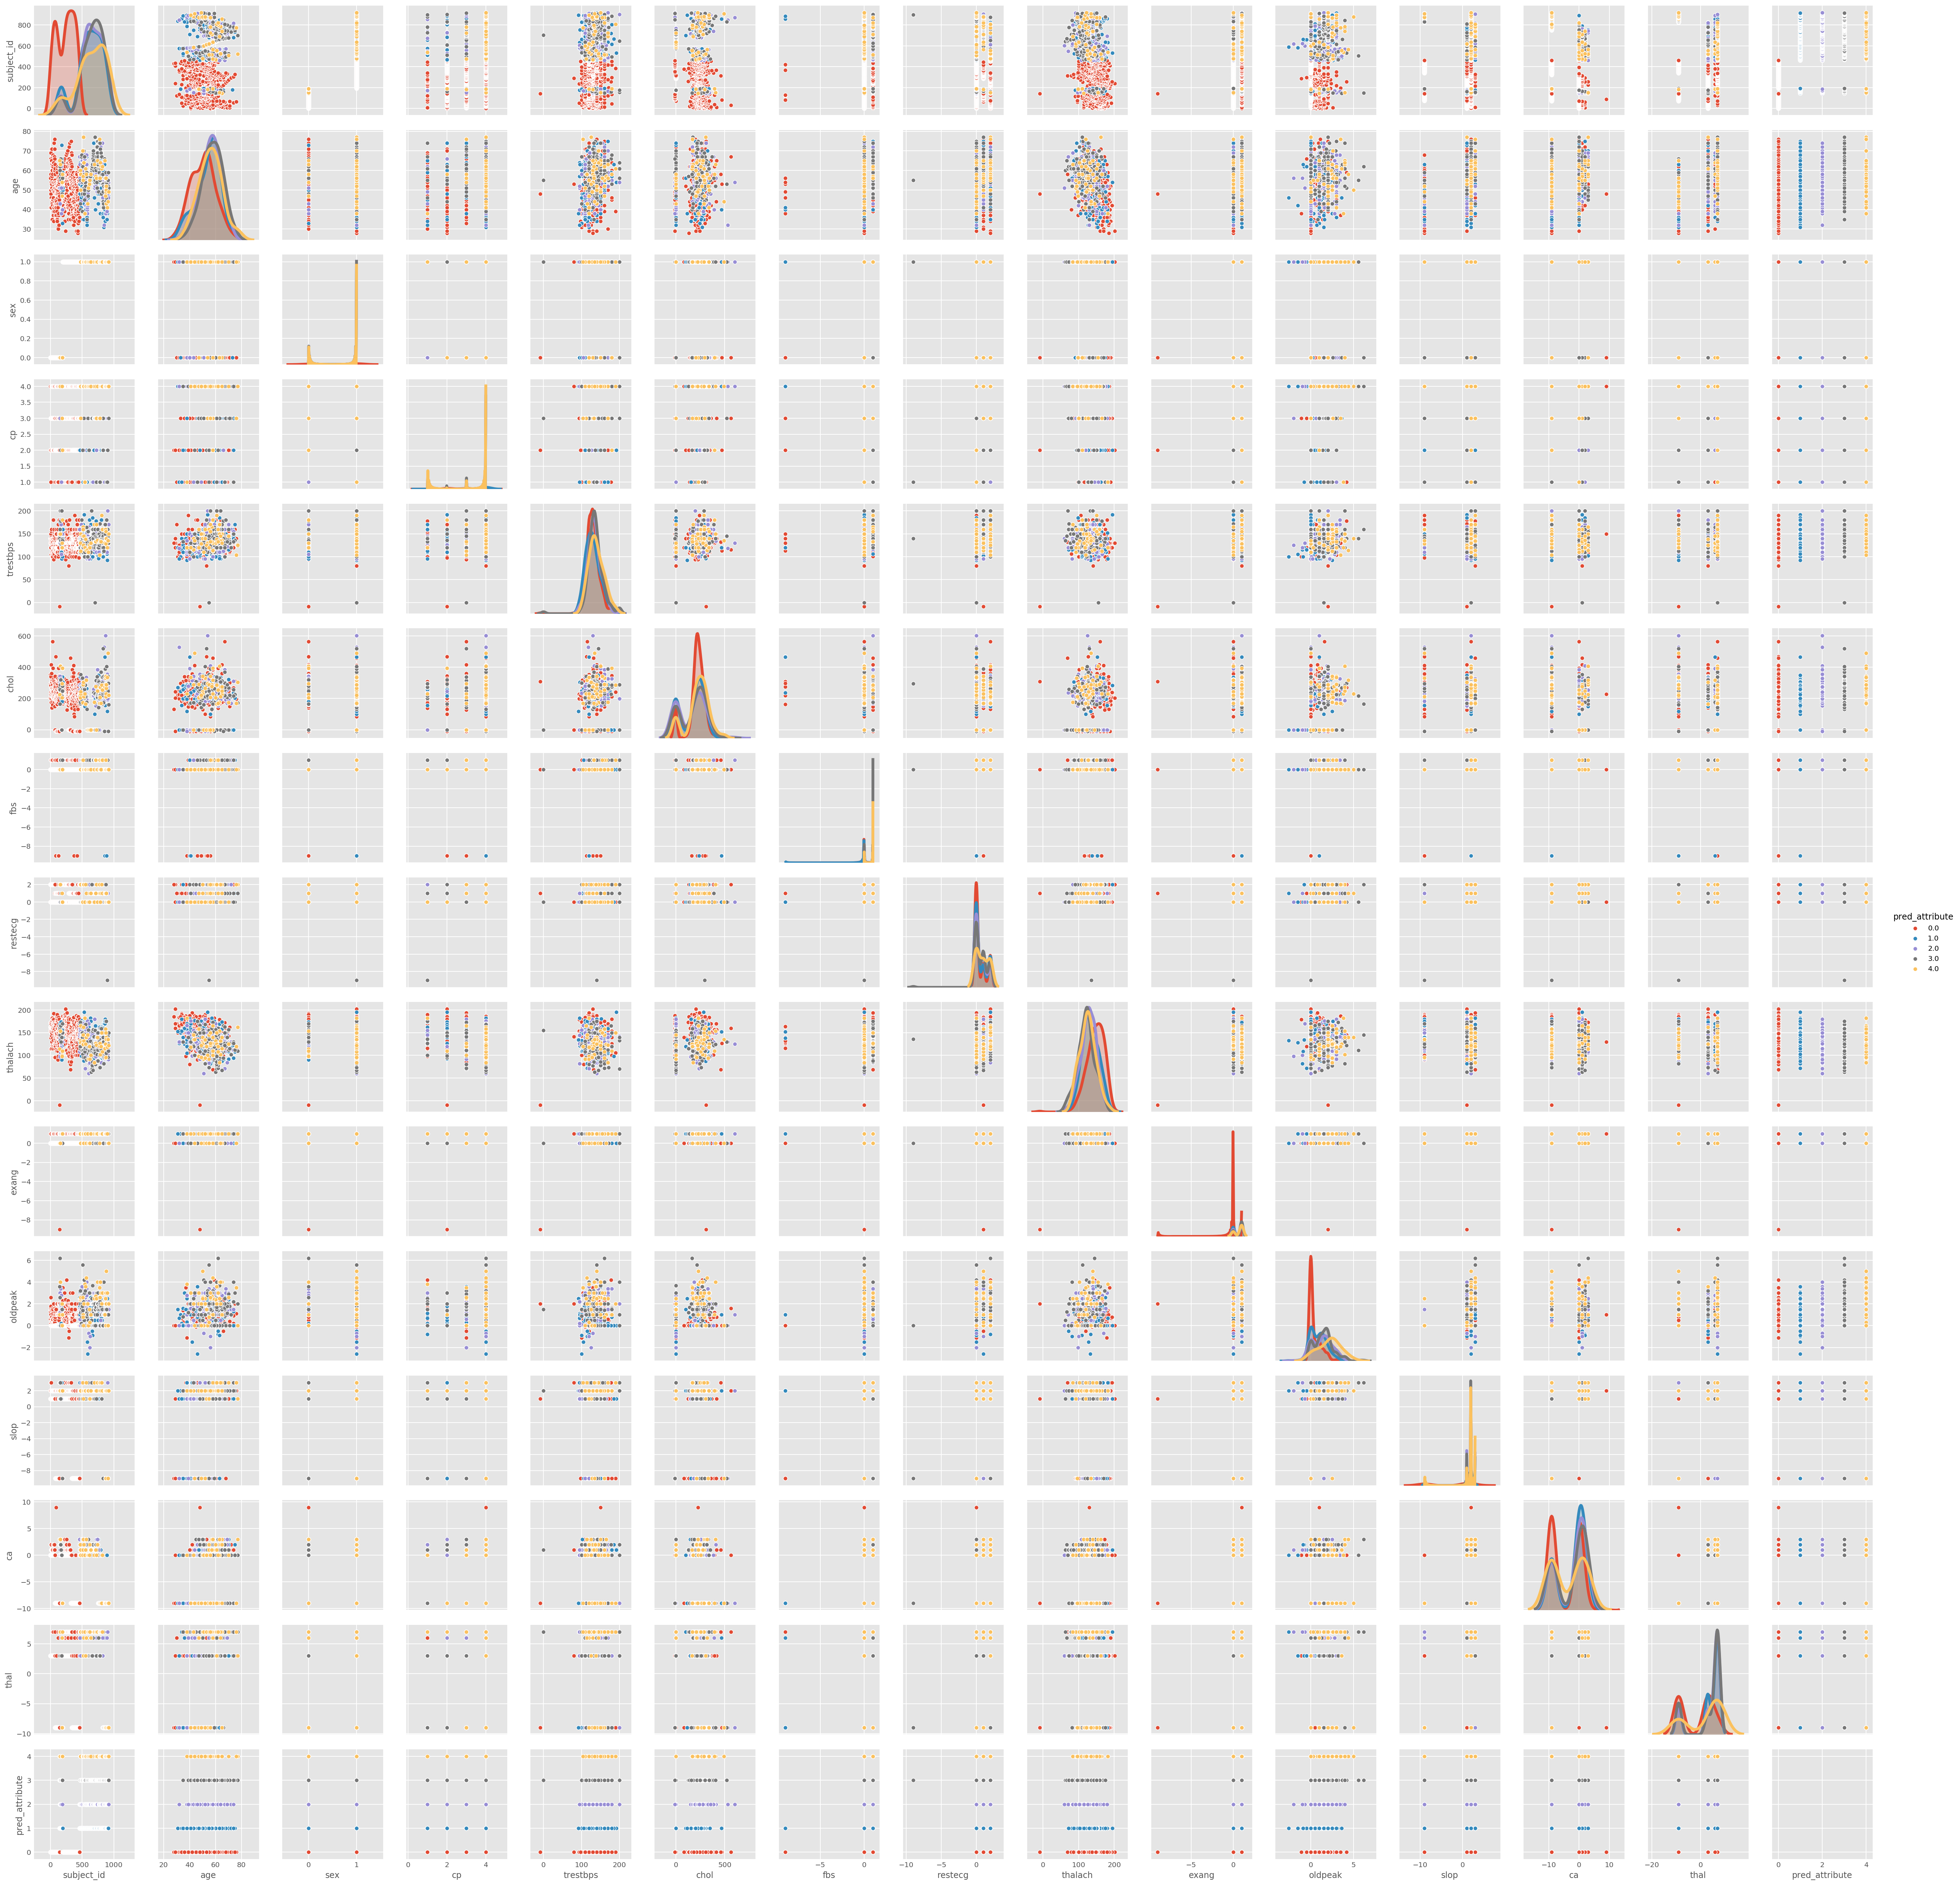

In [449]:
sns.pairplot(df, hue='pred_attribute');

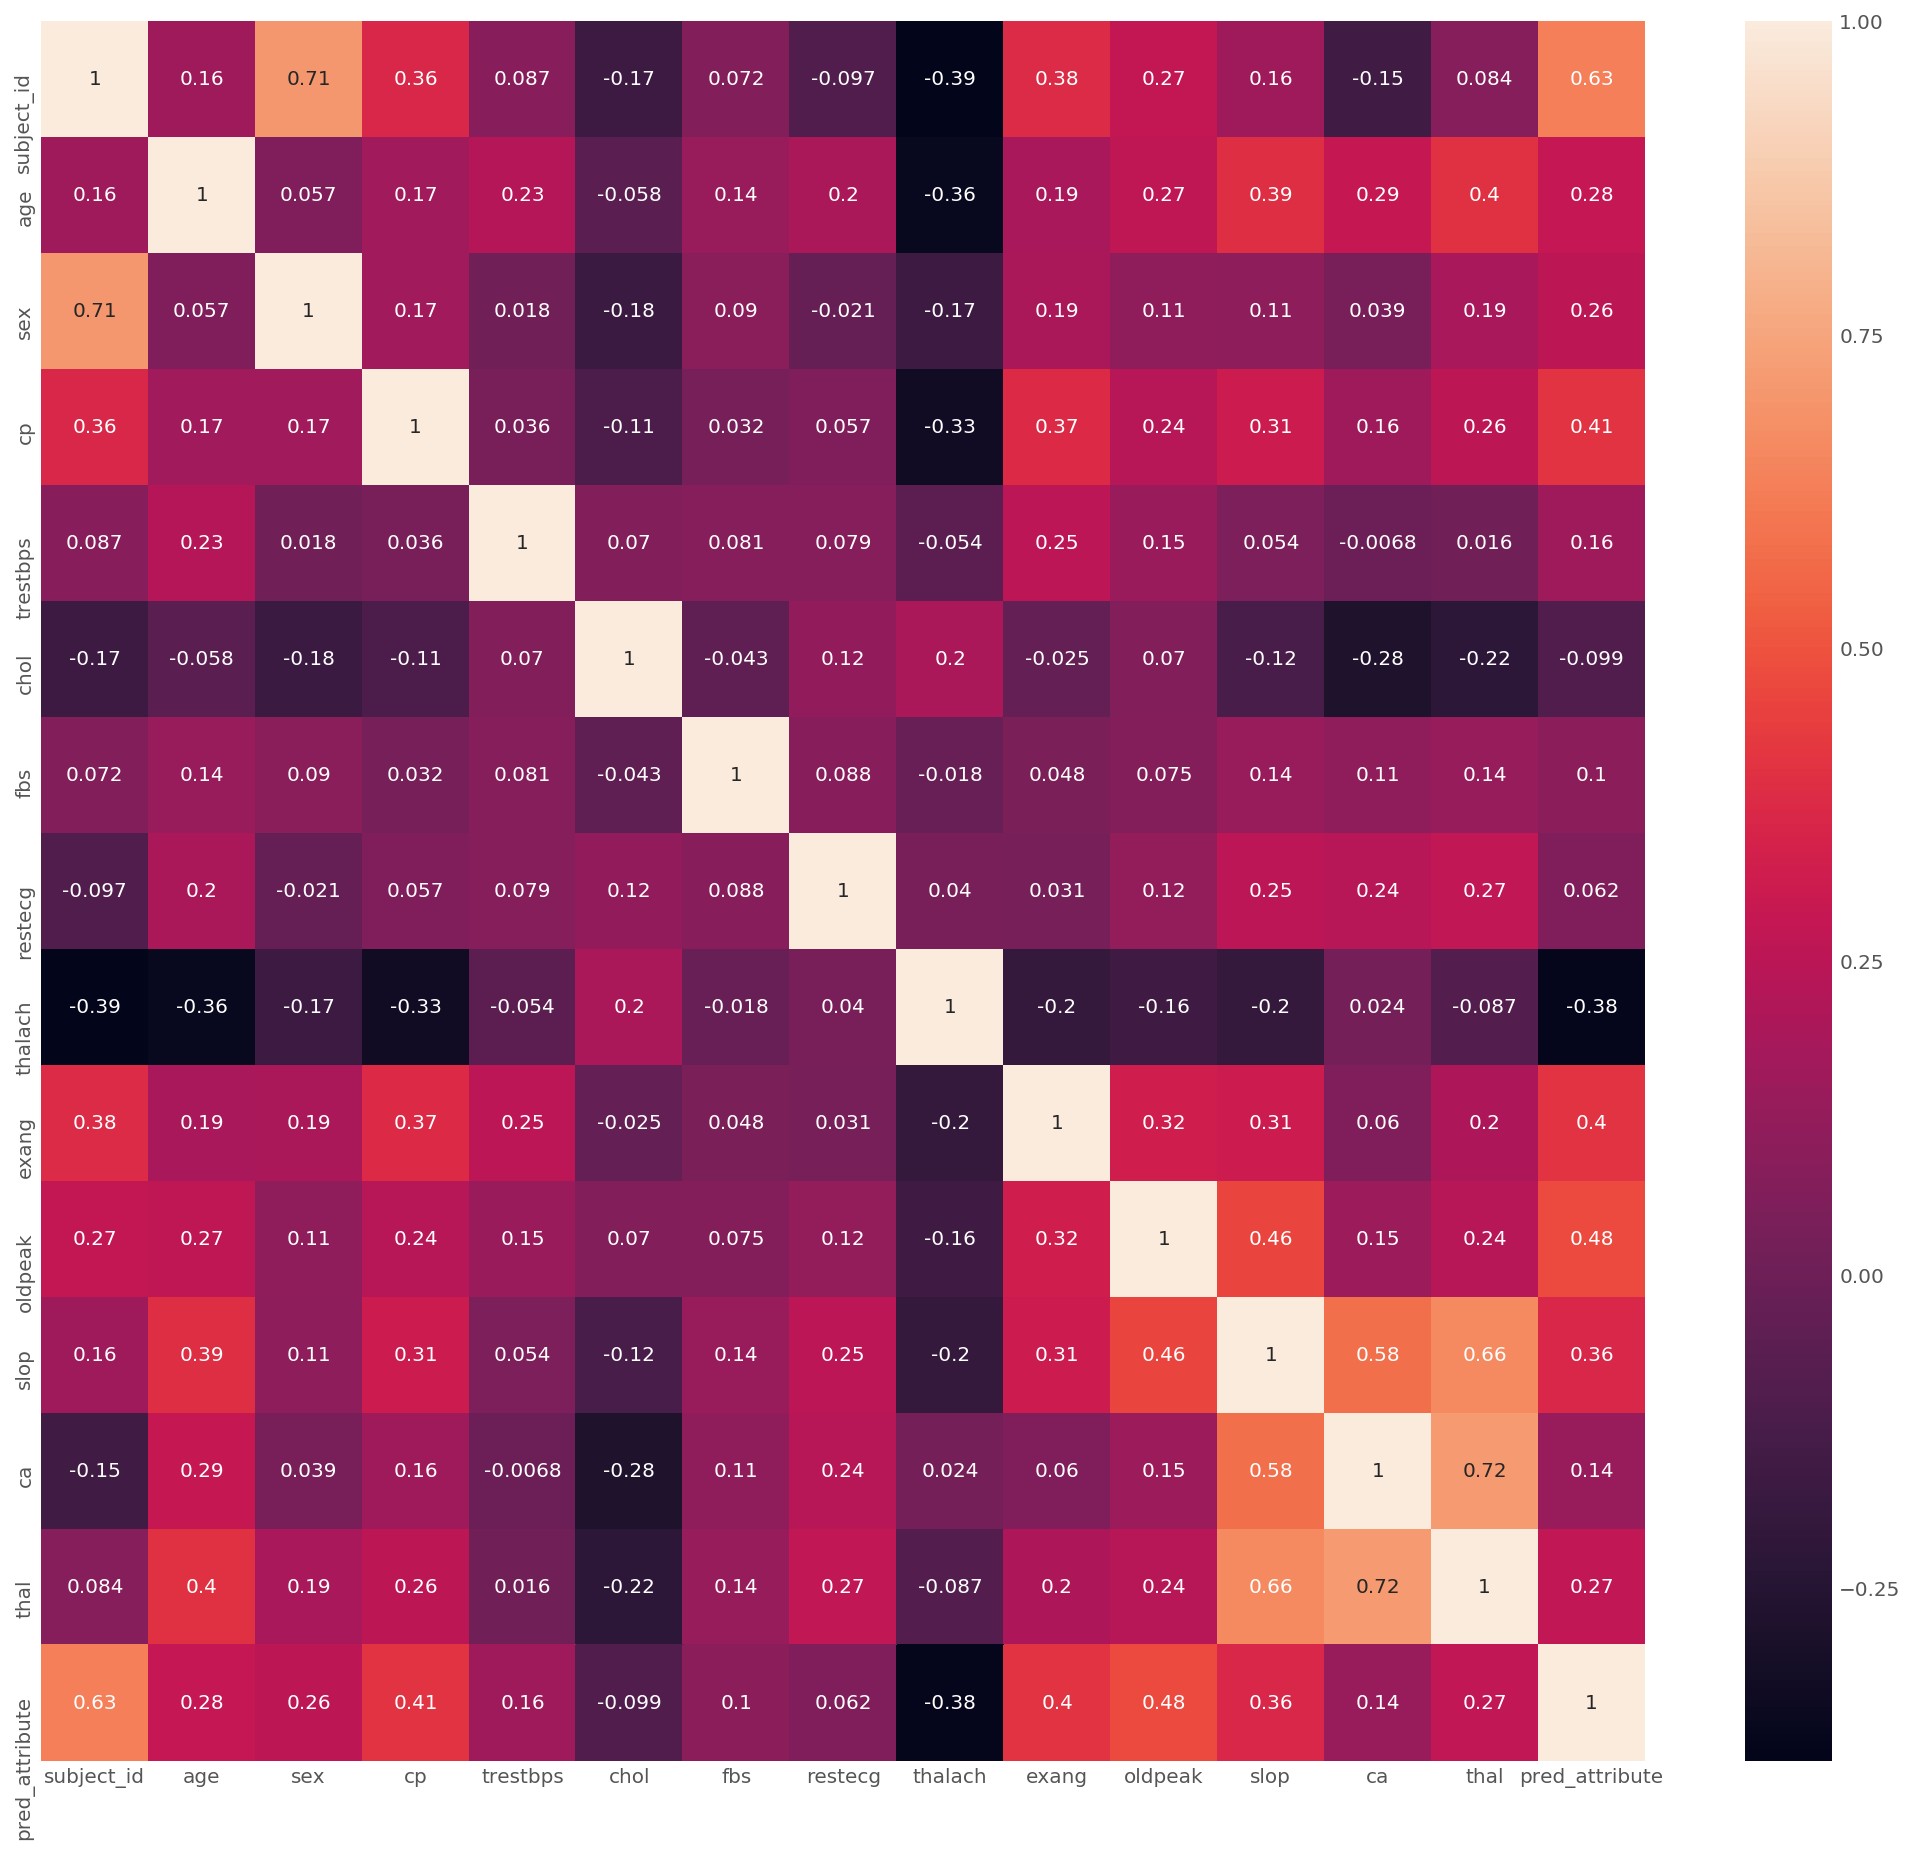

In [450]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

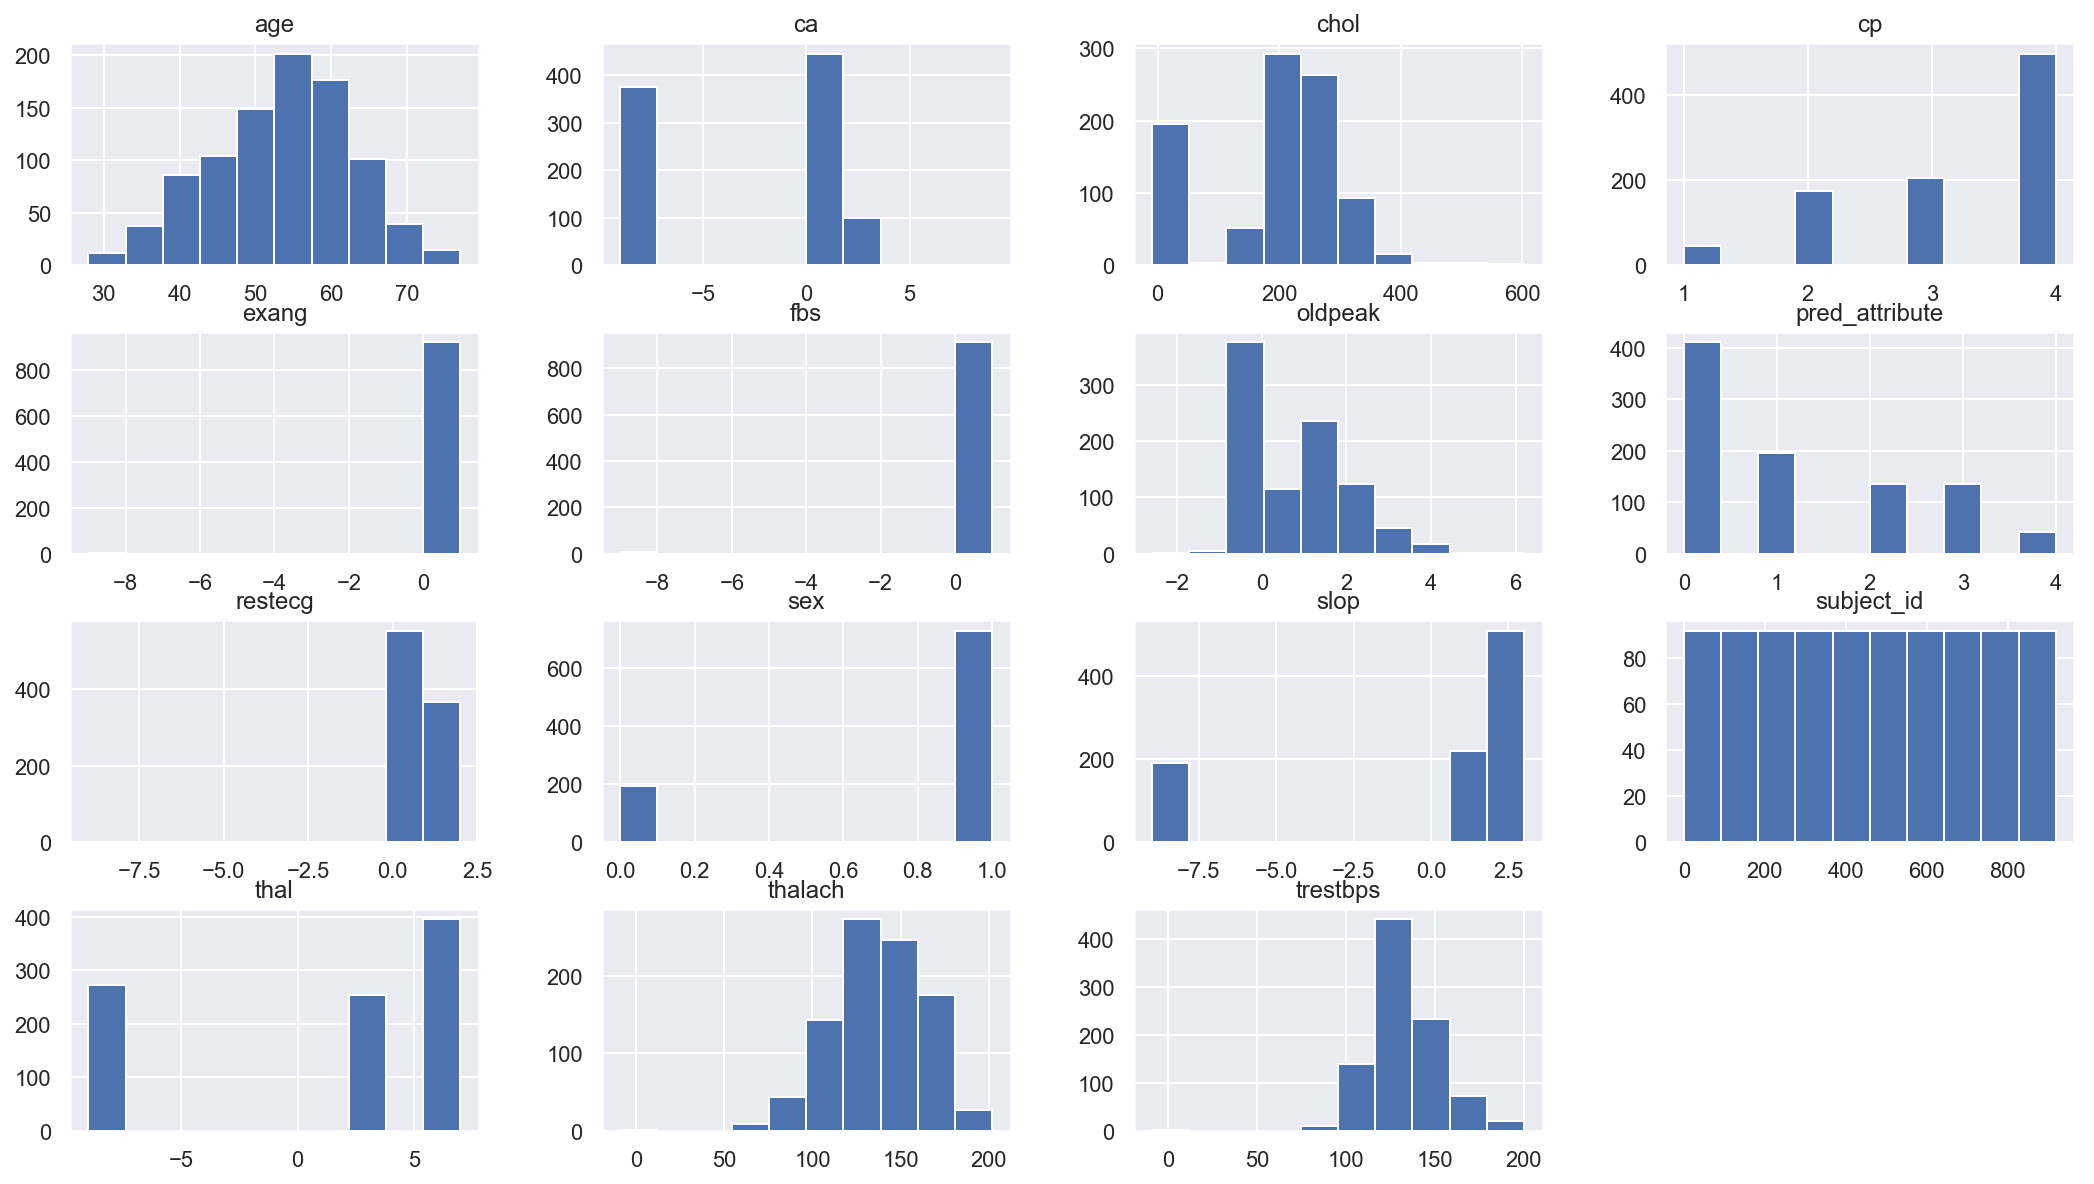

In [451]:
sns.set(rc={'figure.figsize':(16,10)})
df.hist(df.columns);

- In the dataset the subjects are aged mostly around 40-60, and most are male. 

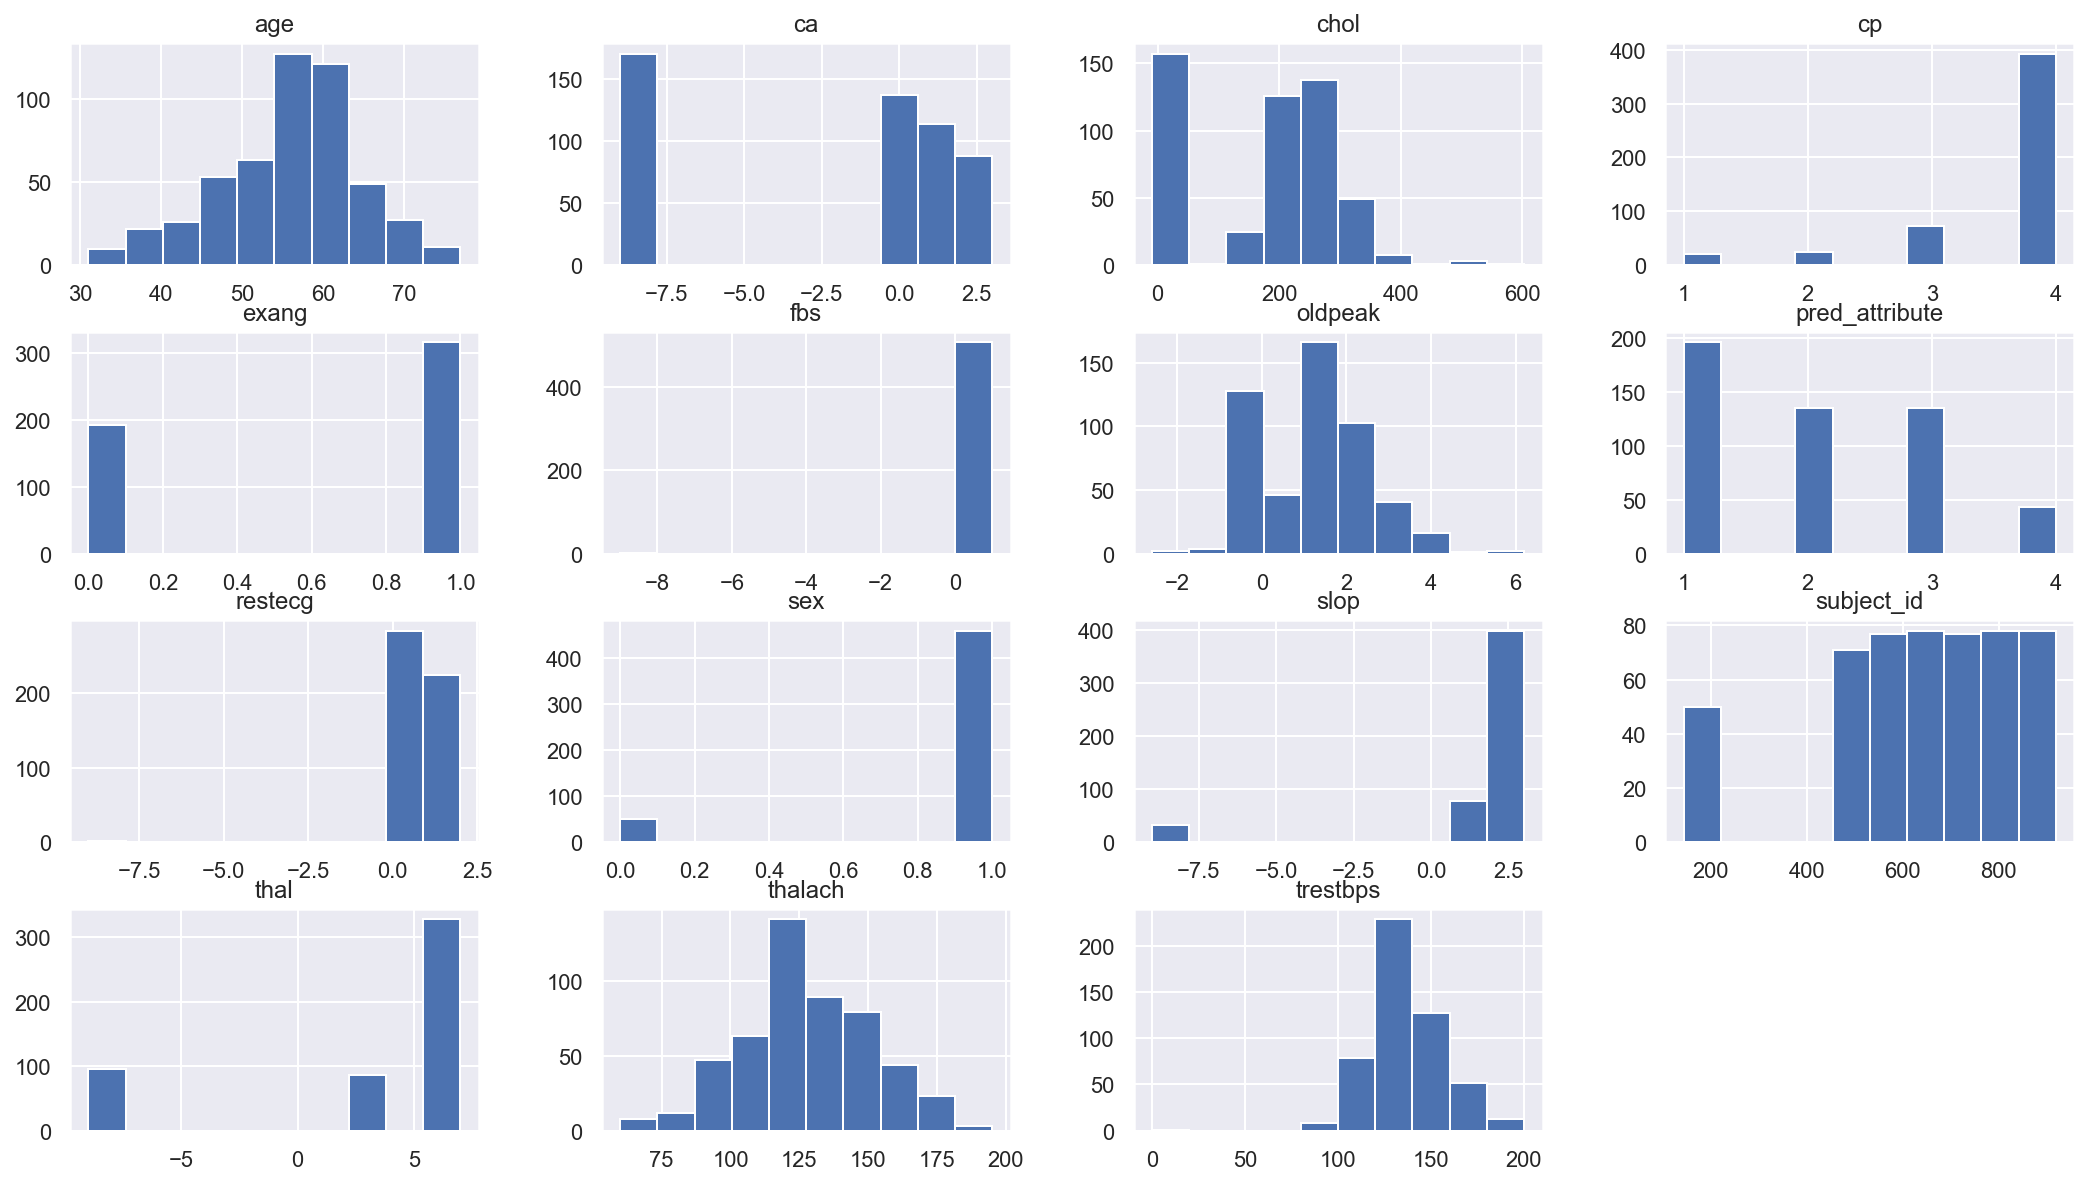

In [452]:
sns.set(rc={'figure.figsize':(16,10)})
df_2 = df[df['pred_attribute']>=1]
df_2.hist(column=df.columns);

- From the graphs above we can see the heat diseased subjects and their approximate heart rates. The subjects are mostly aged around 55-65.

** Continuos Variables **

In [453]:
continuous = df[['age','chol','thalach', 'trestbps', 'oldpeak']]

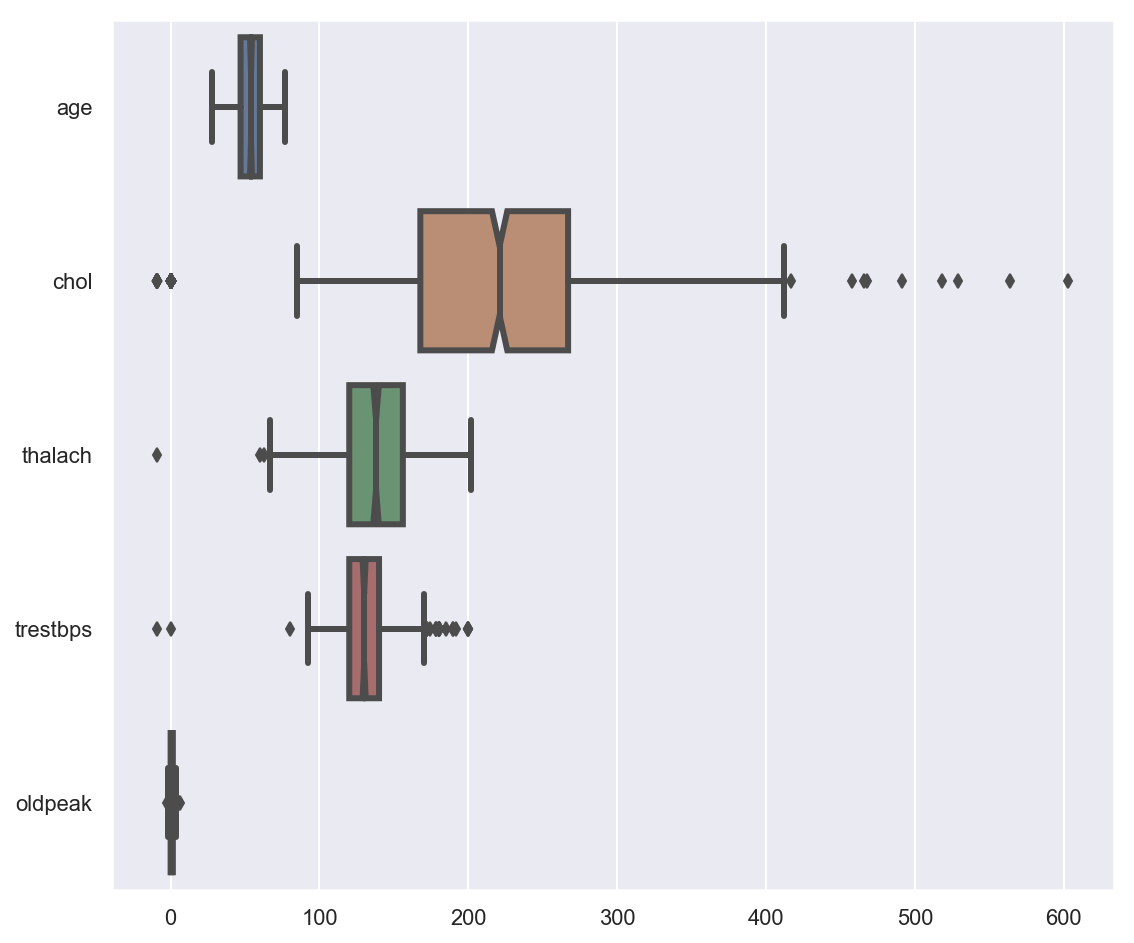

In [454]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

sns.boxplot(data=continuous, orient='h', fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

In [455]:
continuous.describe()

age        chol     thalach    trestbps     oldpeak
count  920.000000  920.000000  920.000000  920.000000  920.000000
mean    53.510870  193.764899  136.873454  131.989130    0.902000
std      9.424685  113.728154   25.744671   19.023835    1.066987
min     28.000000   -9.000000   -9.000000   -9.000000   -2.600000
25%     47.000000  167.750000  120.000000  120.000000    0.000000
50%     54.000000  221.000000  138.000000  130.000000    0.600000
75%     60.000000  267.000000  156.000000  140.000000    1.500000
max     77.000000  603.000000  202.000000  200.000000    6.200000

** Categorical **

In [456]:
categorical = df[['sex', 'cp', 'origin', 'restecg', 'exang', 'fbs', 'slop', 'thal', 'ca']]

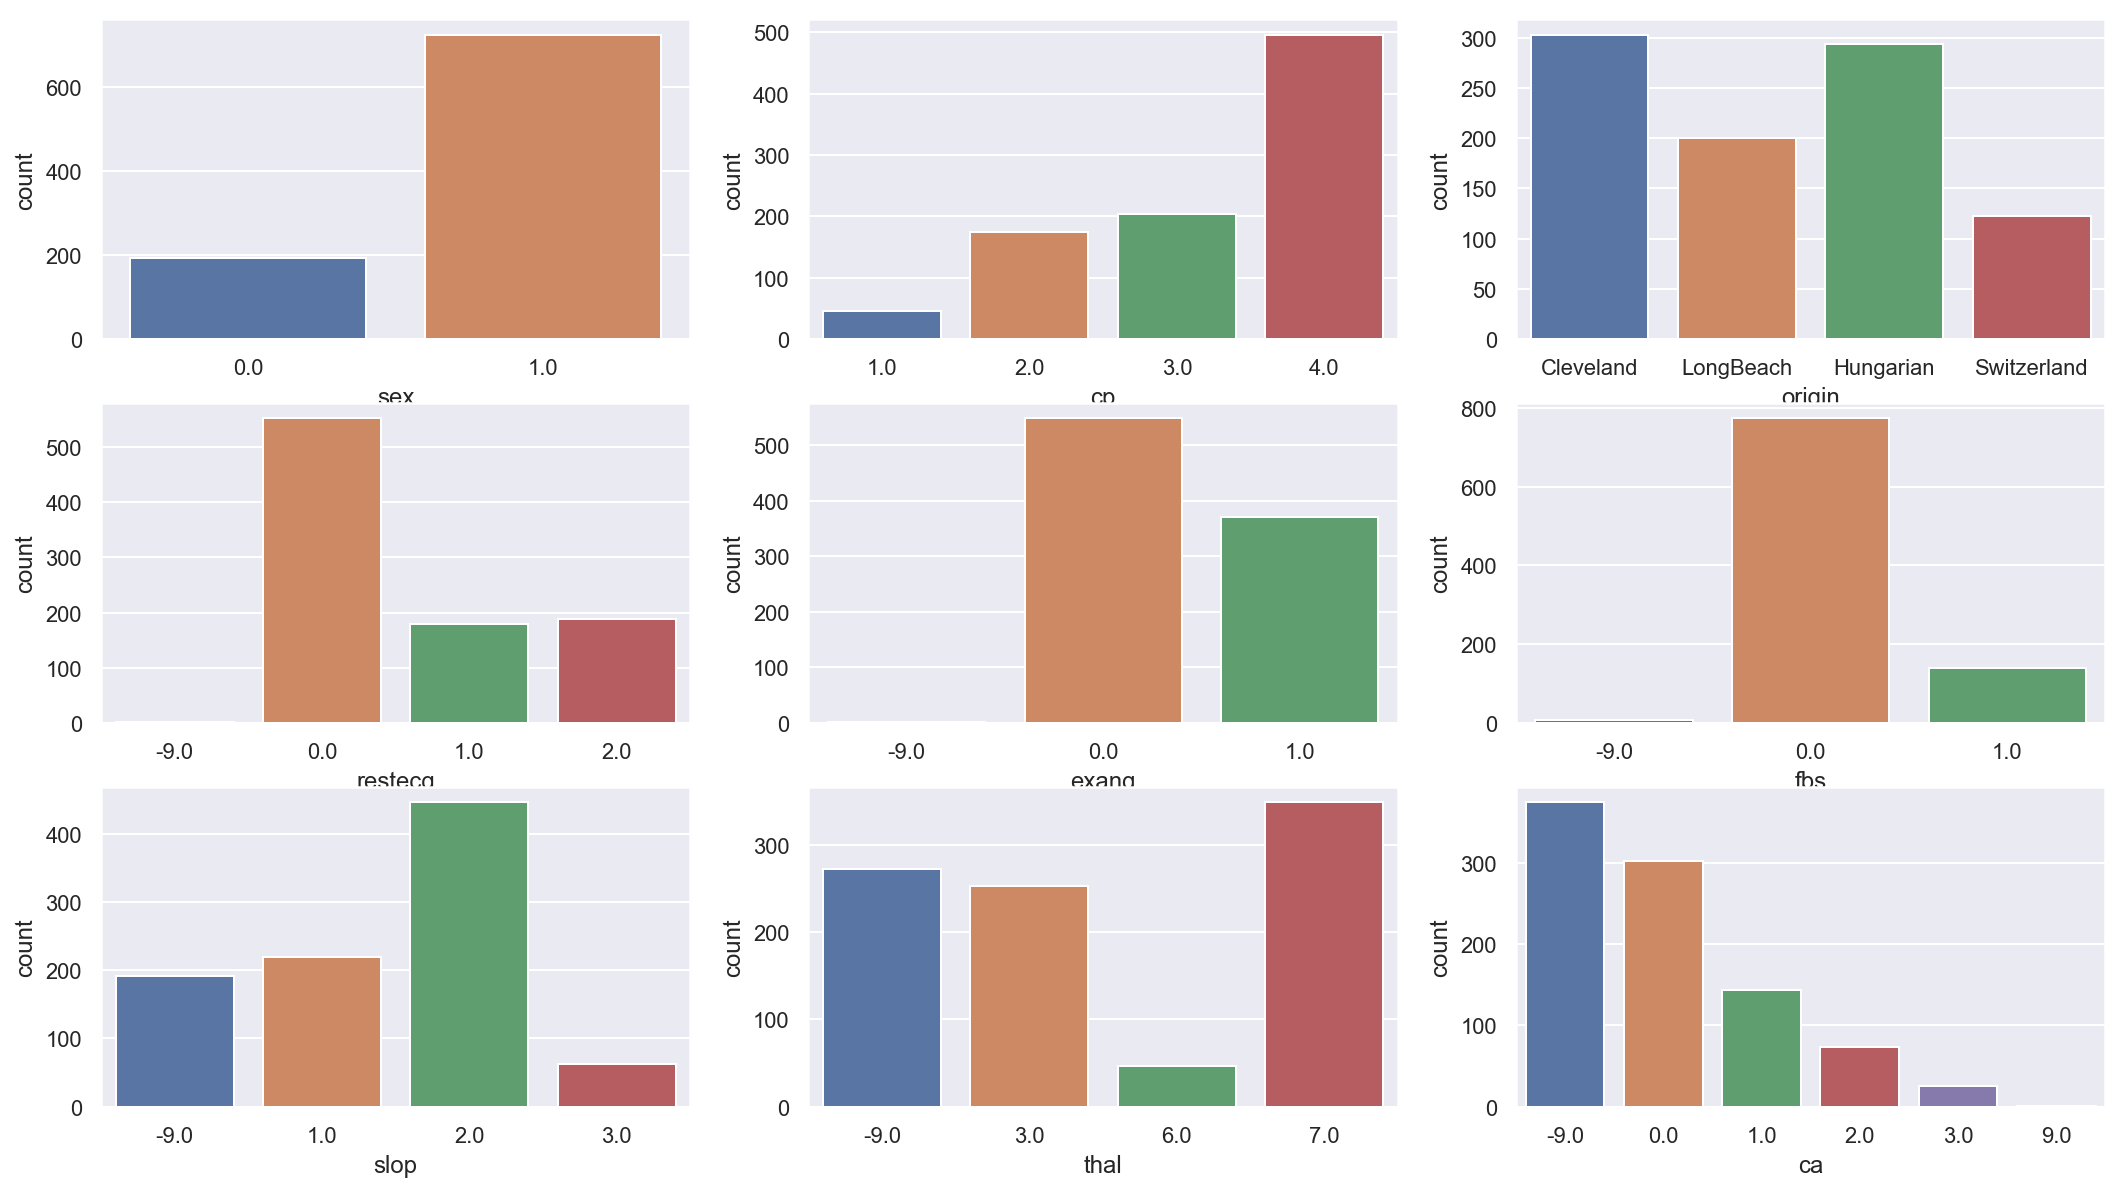

In [457]:
fig, ax =plt.subplots(3,3)
sns.set(rc={'figure.figsize':(16,10)})

sns.countplot(x=categorical.columns[0],data=categorical, ax = ax[0][0])
sns.countplot(x=categorical.columns[1],data=categorical, ax = ax[0][1])
sns.countplot(x=categorical.columns[2],data=categorical, ax = ax[0][2])
sns.countplot(x=categorical.columns[3],data=categorical, ax = ax[1][0])
sns.countplot(x=categorical.columns[4],data=categorical, ax = ax[1][1])
sns.countplot(x=categorical.columns[5],data=categorical, ax = ax[1][2])
sns.countplot(x=categorical.columns[6],data=categorical, ax = ax[2][0])
sns.countplot(x=categorical.columns[7],data=categorical, ax = ax[2][1])
sns.countplot(x=categorical.columns[8],data=categorical, ax = ax[2][2])

fig.show()

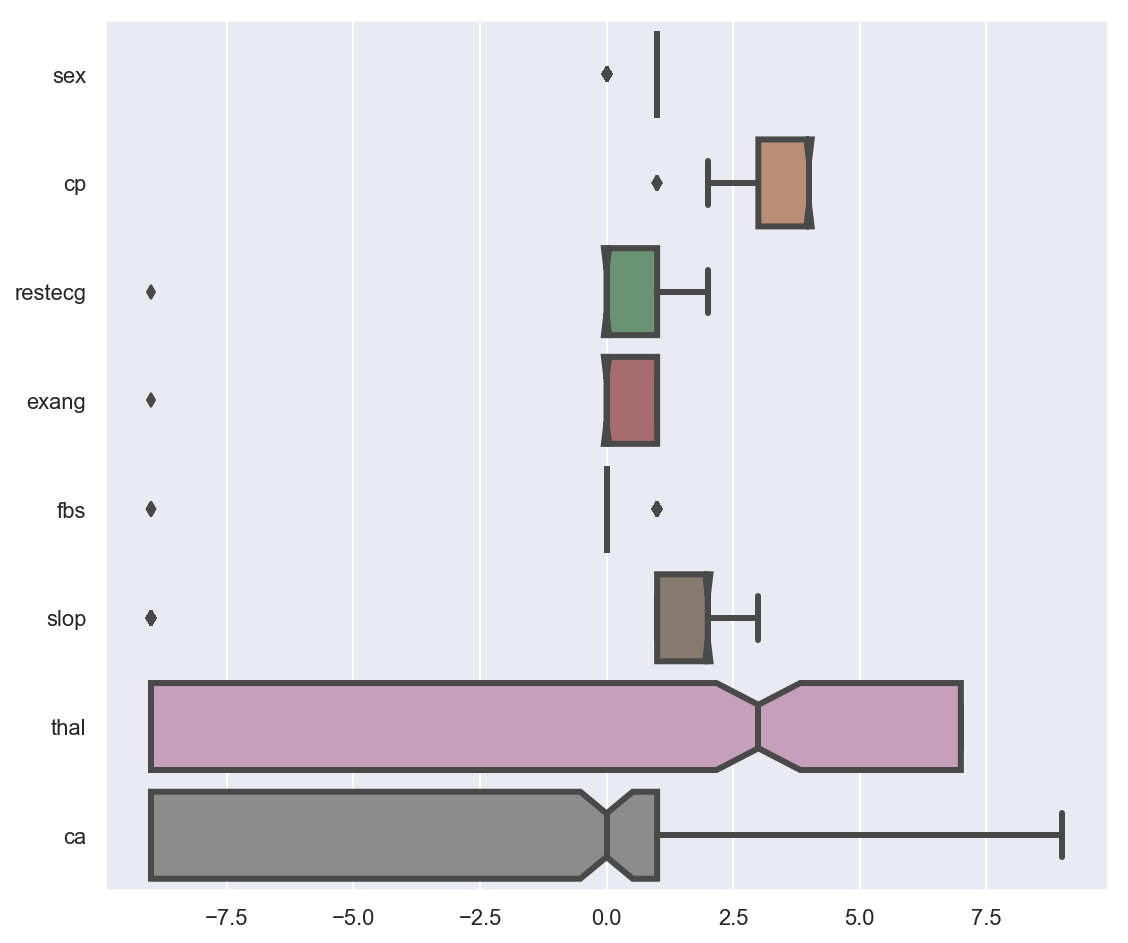

In [458]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

sns.boxplot(data=categorical, orient='h', fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

In [459]:
df.pred_attribute.value_counts(normalize=True)

0.0    0.446739
1.0    0.213043
2.0    0.146739
3.0    0.146739
4.0    0.046739
Name: pred_attribute, dtype: float64